# Mid Semester Project - DEEP Reinforcements Learning
# ENV1 - EMPTY GRID ENVIRONMENT
Dear students,<br> this is the template notebook. Please copy it by clicking on the "File" tab and then on "Save a copy into drive".

---
<br>

### Name and ID:
Student 1: Reut Dayan 206433245
<br>
Student 2: Yuval Saadaty 205956634
<br><br>
<img src="https://raw.githubusercontent.com/Farama-Foundation/Minigrid/master/minigrid-text.png">

### https://minigrid.farama.org/

# Pre-Requisit

## Installs

In [ ]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install gym
!pip install gym-minigrid
!pip install pygame
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install -U --no-cache-dir gdown --pre

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [812 kB]
Get:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,369 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,019 kB]
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]

## Imports

In [ ]:
import numpy as np
import gym
from gym import logger as gymlogger
from gym.utils import seeding
from gym import error, spaces, utils
gymlogger.set_level(40) # error only
import glob
import io
import base64
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2
import math
import glob
from pyvirtualdisplay import Display
from IPython.display import HTML
from IPython import display as ipythondisplay
import pygame
import pyvirtualdisplay
import imageio
import IPython
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


## Display utils
The cell below contains the video display configuration. No need to make changes here.

In [ ]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

#Env1 - Empty Env

## Class Env

In [ ]:
# copy minigrid_x.py file from drive to colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Path to the file in Google Drive
source_file_path = '/content/drive/MyDrive/minigrid_x.py'

# Destination path in the content directory of Colab
destination_path = '/content/minigrid_x.py'

# Copy the file
shutil.copyfile(source_file_path, destination_path)


'/content/minigrid_x.py'

In [ ]:
from __future__ import annotations
from gym_minigrid.minigrid import COLOR_NAMES
from gym_minigrid.minigrid import Grid
from gym_minigrid.minigrid import MissionSpace
from gym_minigrid.minigrid import Door, Goal, Key, Wall, Lava, Floor
from minigrid_x import MiniGridEnv
from gym import spaces
import random

class RandomEmptyEnv_10(MiniGridEnv):
    def __init__(
        self,
        size=10, # DEFINE THE WIDTH AND HEIGHT
        agent_start_pos=(1, 1),
        agent_start_dir = 0,
        max_steps: int | None = None,
        **kwargs,
    ):

        self.agent_start_pos = agent_start_pos
        self.agent_start_dir = agent_start_dir

        agent_start_x_loc =random.randint(1, 6)
        agent_start_y_loc =random.randint(1, 6)

        self.agent_start_pos = (agent_start_x_loc,agent_start_y_loc)

        mission_space = MissionSpace(mission_func=self._gen_mission)

        if max_steps is None:
            max_steps = 4 * size**2

        super().__init__(
            mission_space=mission_space,
            grid_size=size,
            # Set this to True for maximum speed
            see_through_walls=True,
            max_steps=max_steps,
            **kwargs,
        )
        self.action_space = spaces.Discrete(3)
        self.walls_init = []

        # change 21-09 for random env
        self.not_goal_loc = [(col,row) for col in range(self.unwrapped.width) for row in range(self.unwrapped.height) if row == 0 or row == (self.unwrapped.width-1) or col == 0 or col == (self.unwrapped.height-1)]
        self.not_goal_loc.append(self.agent_start_pos)
        self.goal_pos = (self.grid.width - 2, self.grid.height - 2)

    def reset(self, **kwargs):
        # Randomize start position each time environment is reset
        agent_start_x_loc = random.randint(1, 6)
        agent_start_y_loc = random.randint(1, 6)
        self.agent_start_pos = (agent_start_x_loc, agent_start_y_loc)

        self.values = [0, 1, 2, 3]
        self.agent_start_dir = random.choice(self.values)

        # Recalculate not_goal_loc as it depends on the agent's start position
        self.not_goal_loc = [(col, row) for col in range(self.unwrapped.width) for row in range(self.unwrapped.height)
                             if row == 0 or row == (self.unwrapped.width - 1) or col == 0 or col == (self.unwrapped.height - 1)]
        self.not_goal_loc.append(self.agent_start_pos)

        # Call the reset method of the parent class
        return super().reset(**kwargs)

    @staticmethod
    def _gen_mission():
        return "grand mission"

    def _gen_grid(self, width, height):
        # Create an empty grid
        self.grid = Grid(width, height)

        # Generate the surrounding walls
        self.grid.wall_rect(0, 0, width, height)

        # Generate verical separation wall
        # for i in range(0, height):
        #     self.grid.set(5, i, Wall())


        for column, row in self.walls_init:
          self.grid.set(column, row, Wall())

        self.key_pos = (6, 5)
        self.door_pos = (6, 7)

        self.goal_pos = random.choice([(8,1), (8,8), (1,8)])

        self.put_obj(Goal(), self.goal_pos[0], self.goal_pos[1])

        # Place the agent
        if self.agent_start_pos is not None:
            self.agent_pos = self.agent_start_pos
            self.agent_dir = self.agent_start_dir
        else:
            self.place_agent()

        self.mission = "grand mission"


## WRAPPER

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

class EMPTYRGBImgObsWrapper(gym.core.ObservationWrapper):
    """
    Wrapper to use fully observable RGB image as the only observation output,
    no language/mission. This can be used to have the agent to solve the
    gridworld in pixel space.
    """

    def __init__(self, env, tile_size=32, plot=False, preprocess= lambda x: x):
        super().__init__(env)
        self.tile_size = tile_size
        self.plot = plot
        self.observation_space = spaces.Box(
            low=0,
            high=255,
            # #the default is (320,320,3). Tile size  = 32 X 10 (grid size)
            # TODO: BE CAREFULL TO CHANGE the shape size to be according your preprocess size/channels
            # The env information i staken from here
            shape=(320, 320, 3),
            dtype='uint8'
        )
        self.prev_door = False
        self.prev_key = False
        self.action_space = spaces.Discrete(self.action_space.n)

        self._preprocess = self.preprocess_image


    def preprocess_image(self, image):
      image = image.transpose(2,0,1)
      # Convert ndarray to PIL Image
      image_pil = Image.fromarray(image.transpose((1, 2, 0)))  # Assuming 'image' is a ndarray with shape (3, 320, 320)

      # Define transformations to be applied to the images - dataset preprocess
      transform = transforms.Compose([
          transforms.Resize((110, 110)),       # Resize the image to 110*110
          transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
          transforms.CenterCrop((84, 84)),  # Crop the center 84*84 portion of the image
          transforms.ToTensor(),              # Convert the image to a PyTorch tensor and maps [0,255] to [0,1]
          ])

      # Apply the transformation
      transformed_image = transform(image_pil)

      return transformed_image


    def observation(self, obs):
      env = self.unwrapped

      # Call render without any unsupported keyword arguments
      rgb_img = env.render()  # Use the default rendering behavior
      return rgb_img

    def reset(self, seed = 0, options = None):
        self.prev_door = False
        self.prev_key = False
        obs, info = super().reset()
        if self.plot:
            plt.show()
        return self._preprocess(obs), info

    def step(self, action):
        reward = 0
        if action == 2: # go forward
          if (self.env.agent_dir == 1 and self.env.agent_pos[1]==8):
            reward = -20
          elif (self.env.agent_dir == 2 and self.env.agent_pos[0]==1):
            reward = -20
          elif (self.env.agent_dir == 3 and self.env.agent_pos[1]==1):
            reward = -20
          elif (self.env.agent_dir == 0 and self.env.agent_pos[0]==8):
            reward = -20
          else:
            reward = -1
        else: #turn
          reward = -7

        obs, r, d, info, x = super().step(action)
        obs = self._preprocess(obs)
        if d:
          r = 100
        else:
          r = reward

        return obs, r, d, info, x

## Env Info

torch.Size([1, 84, 84])


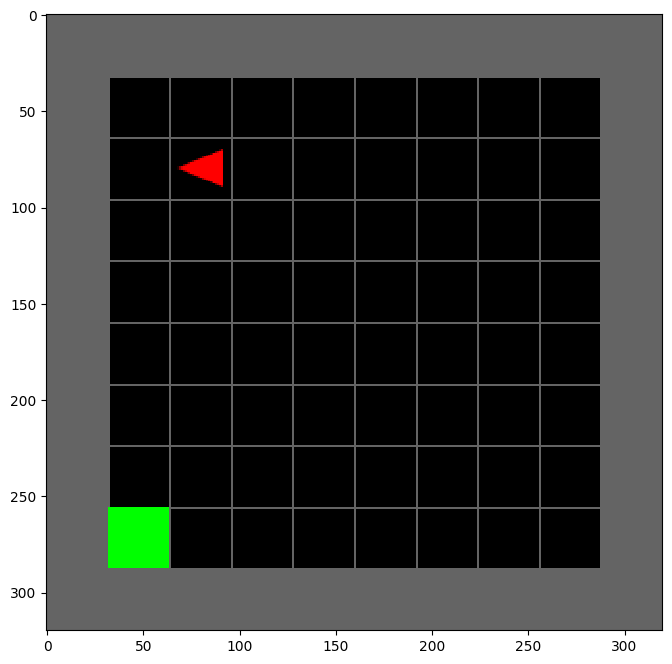

In [ ]:
env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))
obs = env.reset()[0]
print(obs.shape)
screen = env.render()
plt.imshow(screen)

-1
-1
good


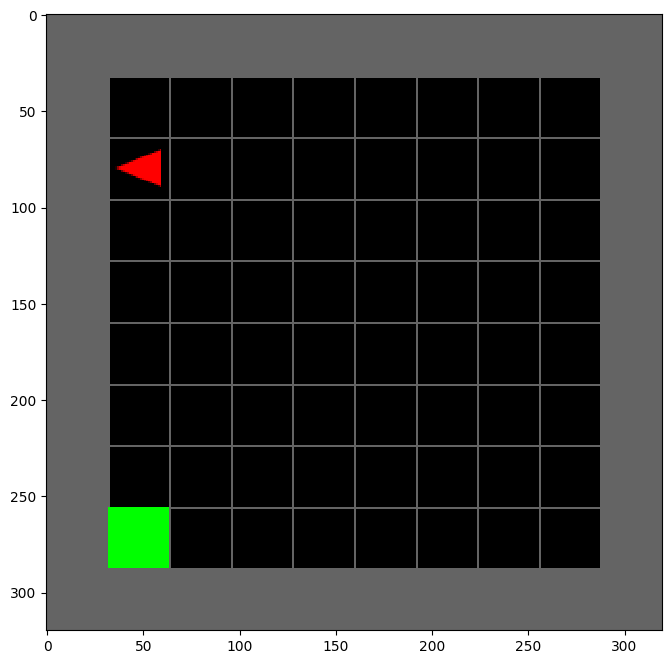

In [ ]:
action = 2
obs, r, d, info, x = env.step(action)
print(r)
env.env.agent_dir # 1 - down, 2 - left, 3 - up, 0 - right
if action == 2:
  if (env.env.agent_dir == 1 and env.env.agent_pos[1]==8):
    print(r)
    print("bad down")
  elif (env.env.agent_dir == 2 and env.env.agent_pos[0]==0):
    print(r)
    print("bad left")
  elif (env.env.agent_dir == 3 and env.env.agent_pos[1]==0):
    print(r)
    print("bad up")
  elif (env.env.agent_dir == 0 and env.env.agent_pos[0]==8):
    print(r)
    print("bad right")
  else:
    print(r)
    print("good")
screen = env.render()
plt.imshow(screen)

In [ ]:
obs = env.reset()[0]
state_size = obs.shape  # Replace with your actual state size
print(state_size)
action_space = env.action_space
num_actions = action_space.n
print(f"Number of actions: {num_actions}")

torch.Size([1, 84, 84])
Number of actions: 3


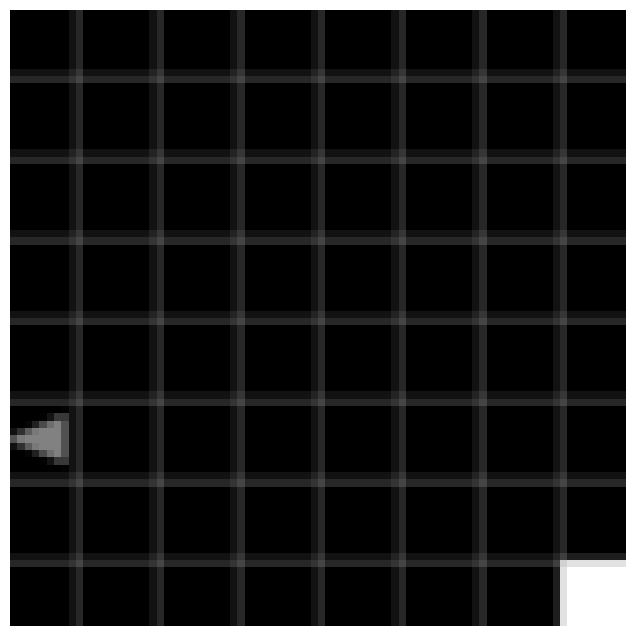

In [ ]:
# Convert the tensor to a numpy array
array = obs.squeeze().numpy()

# Display the array as an image using matplotlib
plt.imshow(array, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

## Random action

In [ ]:
env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))
obs = env.reset()
video_filename = '/content/vid.mp4'
max_steps = 100
# Evaluation
with imageio.get_writer(video_filename, fps=10) as video:
  obs = env.reset()
  done = False
  total_reward = 0
  for step in range(max_steps):
      action = env.action_space.sample()
      obs, reward, done, _, _ = env.step(action)
      next_obs = obs  # Get agent's position directly from the environment
      video.append_data(env.render())
      if done:
        print("done","reward=", total_reward,"num_of_steps=",step)
        break
embed_mp4(video_filename)

## DQN

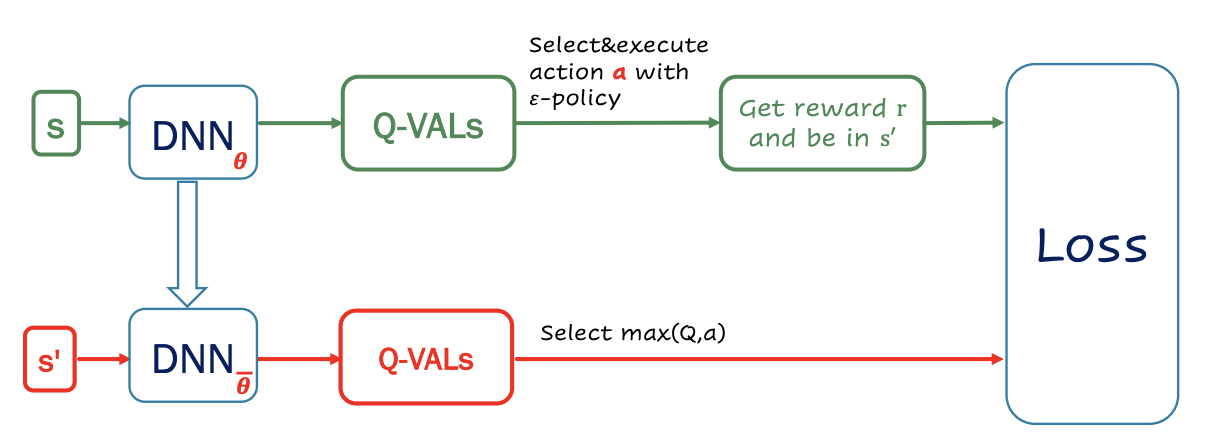

**Deep Q-Network (DQN)**


Deep Q-Network (DQN) is a reinforcement learning algorithm that combines Q-learning with deep neural networks to approximate the Q-function, which represents the maximum expected future rewards for each action in a given state. DQN was introduced by DeepMind in their seminal paper "Playing Atari with Deep Reinforcement Learning" in 2013.

**Key Components of DQN Algorithm:**

**Replay Buffer:**  DQN uses experience replay to break the correlation between consecutive samples and stabilize training. Experiences (state, action, reward, next state, done) are stored in a replay buffer, and during training, random minibatches are sampled from this buffer.

**Target Network:** DQN employs a separate target network to stabilize training. The target network's weights are updated less frequently compared to the primary network (policy network). This helps prevent overestimation of Q-values and leads to more stable training.

**Epsilon-Greedy Exploration:** DQN balances exploration and exploitation using an epsilon-greedy strategy. With probability epsilon (eps), the agent selects a random action to explore, otherwise, it selects the action with the highest Q-value according to the policy network.

**Loss Calculation:** DQN minimizes the mean squared error (MSE) between the Q-values predicted by the policy network and the Q-values calculated using the Bellman equation with the target network.

**Soft Update of Target Parameters:** Instead of directly copying weights from the policy network to the target network, DQN performs a soft update, gradually blending the policy network's weights into the target network's weights.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class DQN(nn.Module):
    def __init__(self, input_shape, num_actions):
        super(DQN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=9, stride=4),   # (84-5+1)/4 = 20, (84-9+1)=19
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=4, stride=2), # (19-4+1)/2 = 8
            nn.ReLU(),
            # nn.Conv2d(32, 64, kernel_size=3, stride=1), # (8-3+1)/1 = 4
            # nn.ReLU()
        )
        conv_out_size = self._get_conv_out(input_shape)
        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 512),
            nn.ReLU(),
            nn.Linear(512, num_actions)
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(torch.prod(torch.tensor(o.size())))

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [ ]:
from collections import deque, namedtuple

class ReplayBuffer:
    def __init__(self, buffer_size):
      self.memory = deque(maxlen=buffer_size)
      self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])


    def add(self, state, action, reward, next_state, done):
      # add experience to replay memory
      e = self.experience(state, action, reward, next_state, done)
      self.memory.append(e)

    def sample(self, batch_size):
      # get random minibatch from memory
      experiences = random.sample(self.memory, k=batch_size)

      # stack all non none states
      states = torch.stack([e.state for e in experiences])
      actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
      rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
      next_states = torch.from_numpy(np.stack([e.next_state for e in experiences if e is not None])).to(device)
      dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

      return (states, actions, rewards, next_states, dones)

    def __len__(self):
      # Return the current size of the replay memory
      return len(self.memory)

In [ ]:

BUFFER_SIZE =    10000           # buffer size
BATCH_SIZE         =    32       # minibatch size
GAMMA              =    0.99     # discount factor
SOFT_UPDATE_RATE   =    1e-3     # for soft update of target parameters
LEARNING_RATE      =    5e-4     # learning rate
UPDATE_EVERY       =    5        # how often to update the network
n_episodes=10000                 #number of episodes - reset the game
max_t=800                        #maximum number of timesteps per episode
eps_start=1.0
eps_end=0.01
eps_decay=0.995

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
policy_network = DQN(obs.shape, env.action_space.n).to(device)
target_network = DQN(obs.shape, env.action_space.n).to(device)
memory = ReplayBuffer(buffer_size=BUFFER_SIZE)
optimizer = optim.Adam(policy_network.parameters(), lr = LEARNING_RATE)

In [ ]:
def epsilon_gredy(state, eps):
  policy_network.eval()
  with torch.no_grad():
    #Forward step
    action_values = policy_network(state.unsqueeze(0))     # calculate the policy network approximation to q vals

    #training mode.
    policy_network.train()

    # Epsilon-greedy action selection
    if random.random() > eps:
      action =  np.argmax(action_values.cpu().data.numpy()) # action that maximaize the q value
    else:
      action = random.choice(np.arange(env.action_space.n)) # random action
    return action

In [ ]:
def learn(batch_size):
  # If enough samples are available in memory, get random subset and learn
  if len(memory) >= batch_size:
    # sample minibatch of experiences
    states, actions, rewards, next_states, dones = memory.sample(batch_size)
    # compute approximation on the target network
    targets_next = target_network(next_states).detach().max(1)[0].unsqueeze(1) # (64,1)

    # Calculate target value from bellman equation
    q_targets = rewards + GAMMA * targets_next * (1 - dones)
    q_expected = policy_network(states).gather(1, actions) # policy_network(state).shape = (B,3) - we gather (1, actions) to index the q-values of selected actions by policy

    ### Loss calculation (we used Mean squared error)
    loss = F.mse_loss(q_expected, q_targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
def copy_weights(t_step):
  # Learn every UPDATE_EVERY time steps.
  if t_step == 0:
    if len(memory) > BATCH_SIZE:
      for target_param, local_param in zip(target_network.parameters(), policy_network.parameters()):
        target_param.data.copy_(SOFT_UPDATE_RATE*local_param.data + (1.0-SOFT_UPDATE_RATE)*target_param.data)

In [ ]:
scores = []
eps = eps_start                    # initialize epsilon
t_step = 0
l_step = 0
n_episodes_for_val = 10
LEARN_EVERY = 5
for i_episode in range(1, n_episodes+1): # number of episodes
  state, _ = env.reset()                 # reset new game
  state = state.to(device)
  score = 0
  for t in range(max_t):
    # Epsilon-greedy action selection
    action = epsilon_gredy(state, eps)

    # Step
    next_state, reward, done, _, _ = env.step(action)
    next_state = next_state.to(device)
    # Add experience to memory
    memory.add(state.clone(), action, reward, next_state.clone(), done)

    next_state = next_state.to(device)
    state=next_state
    l_step = (l_step+1) % LEARN_EVERY
    if l_step == 0:
      learn(batch_size=BATCH_SIZE)

    # Learn every UPDATE_EVERY time steps.
    t_step = (t_step+1) % UPDATE_EVERY
    copy_weights(t_step)
    score += reward
    if done:
      break
  eps = max(eps_end, eps_decay*eps) # decrease epsilon

  scores.append(score) # save most recent score

  print('\rEpisode {}\t Score: {:.2f}'.format(i_episode, score), end="")
  if i_episode % 100 == 0:
    print('\rEpisode {}\t Avarage Score: {:.2f}'.format(i_episode,  np.mean(scores[-100:])))

Episode 100	 Avarage Score: -1946.42
Episode 200	 Avarage Score: -1029.09
Episode 300	 Avarage Score: -624.56
Episode 400	 Avarage Score: -664.96
Episode 500	 Avarage Score: -709.34
Episode 600	 Avarage Score: -548.51
Episode 700	 Avarage Score: -604.97
Episode 800	 Avarage Score: -755.00
Episode 900	 Avarage Score: -521.47
Episode 1000	 Avarage Score: -622.69
Episode 1100	 Avarage Score: -758.15
Episode 1200	 Avarage Score: -580.35
Episode 1300	 Avarage Score: -627.53
Episode 1400	 Avarage Score: -521.29
Episode 1500	 Avarage Score: -567.07
Episode 1600	 Avarage Score: -416.92
Episode 1700	 Avarage Score: -679.53
Episode 1800	 Avarage Score: -731.72
Episode 1900	 Avarage Score: -764.85
Episode 2000	 Avarage Score: -634.26
Episode 2100	 Avarage Score: -775.50
Episode 2200	 Avarage Score: -427.67
Episode 2300	 Avarage Score: -592.94
Episode 2400	 Avarage Score: -507.19
Episode 2500	 Avarage Score: -153.42
Episode 2600	 Avarage Score: -16.78
Episode 2700	 Avarage Score: -39.69
Episode 28

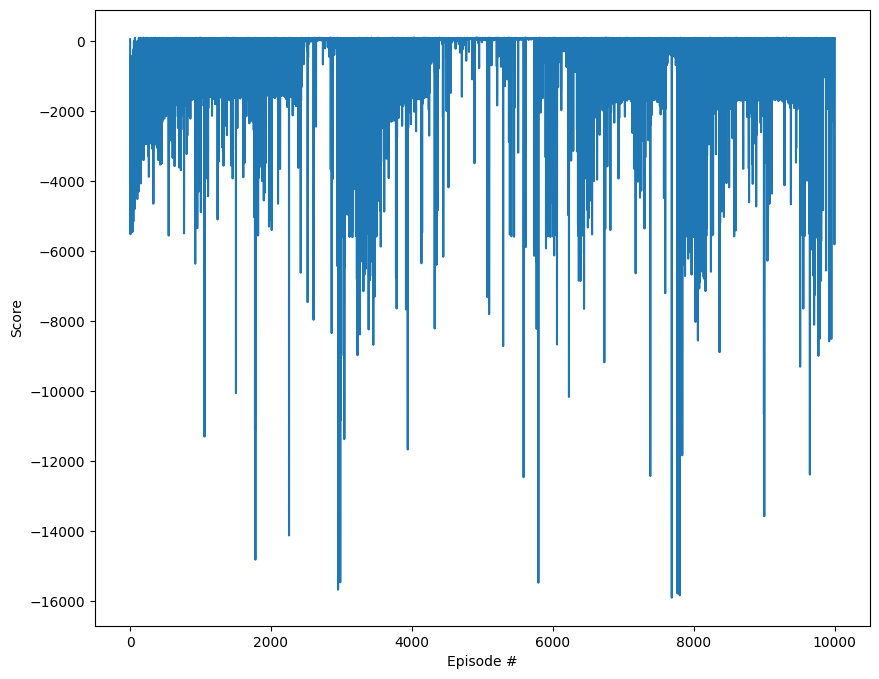

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
torch.save(policy_network.state_dict(), '/content/drive/My Drive/dqn_model_weights.pth')

In [ ]:
from tqdm import tqdm

env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))
video_filename = '/content/vid.mp4'
max_steps = 100
# Evaluation
with imageio.get_writer(video_filename, fps=10) as video:
  obs = env.reset()[0]
  done = False
  total_reward = 0
  obs = obs.to(device)
  for step in tqdm(range(max_steps)):
    pred = policy_network(obs.unsqueeze(0))
    action = pred.max(1)[1].item()
    new_obs, reward, done, _, _ = env.step(action)
    new_obs = new_obs.to(device)
    total_reward += reward
    video.append_data(env.render())
    obs = new_obs
    if done:
      print("done","reward=", total_reward,"num_of_steps=",step)
      break
embed_mp4(video_filename)

  7%|▋         | 7/100 [00:00<00:04, 21.29it/s]

done reward= 81 num_of_steps= 7


In [ ]:
num_episodes = 100
steps_per_episode = []
rewards_per_episode = []
env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10(render_mode='rgb_array'))
max_steps = 100

# Run the episodes
for episode in range(num_episodes):
    obs = env.reset()[0]
    done = False
    total_reward = 0
    obs = obs.to(device)

    for step in tqdm(range(max_steps)):
        pred = policy_network(obs.unsqueeze(0))
        action = pred.max(1)[1].item()
        new_obs, reward, done, _, _ = env.step(action)
        new_obs = new_obs.to(device)
        total_reward += reward
        obs = new_obs

        if done:
            steps_per_episode.append(step)
            rewards_per_episode.append(total_reward)
            break

# Calculate average number of steps
average_steps = np.mean(steps_per_episode)
print("Average number of steps:", average_steps)

# Calculate average reward
average_reward = np.mean(rewards_per_episode)
print("Average reward:", average_reward)


 12%|█▏        | 12/100 [00:00<00:00, 179.60it/s]

Average number of steps: 10.463917525773196
Average reward: 76.36082474226804


##Policy Gradients


Policy Gradients- We want to maximaize the expected reward.
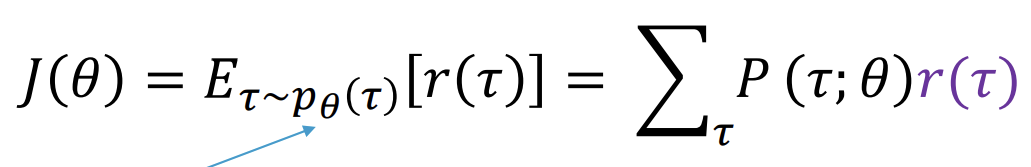

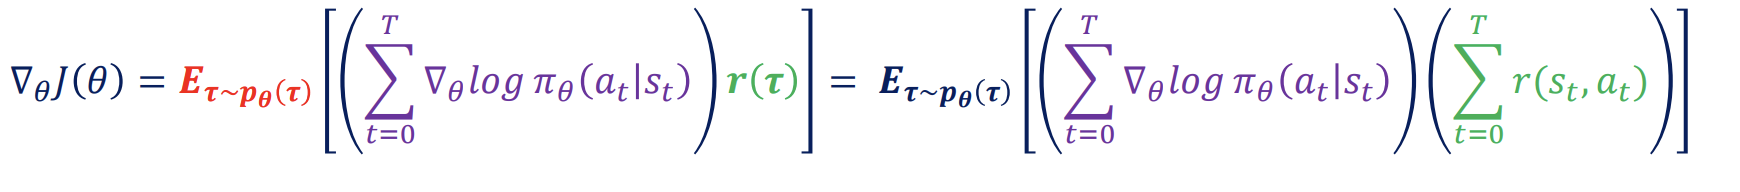

so we use training data set of (s,a) -> from playing the game acording to current policy, and maximizimg the obective function (using gradint ascent).

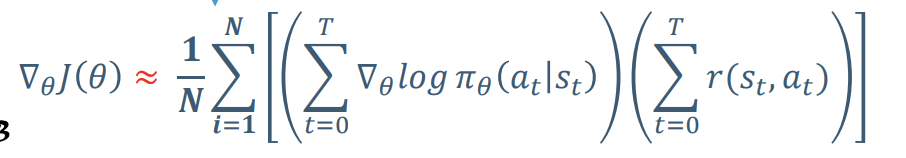


Algorithm
1. Perform a trajectory “roll-out” 𝝉𝑖 using the current policy 𝜋𝜃 𝑎𝑡 𝑠𝑡
2. Store log probabilities (of policy) and reward values at each step
3. Compute policy gradient
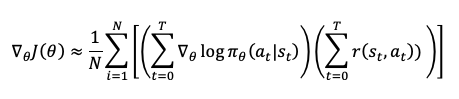
4. Update policy parameter
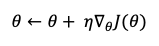
5. Repeat 1–4

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical

class PG(nn.Module):
    def __init__(self, input_shape, num_actions):
        super(PG, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2),   # (84-3+1)/2 = 41, 1*84*84-> 16*41*41
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=4, stride=2), # (41-4+1)/2 = 19 16*41*41->32*19*19
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2), # (19-4+1)/2 = 8 32*18*19 -> 64*8*8
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2), # (8-3+1)/2 = 3 64*8*8 -> 128*3*3
            nn.ReLU()
        )
        conv_out_size = self._get_conv_out(input_shape)
        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 512),
            nn.ReLU(),
            nn.Linear(512, num_actions)
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(torch.prod(torch.tensor(o.size())))

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = F.softmax(self.fc(x), dim=-1)
        return x

    def act(self, state):
        device = next(self.parameters()).device
        state = state.to(device).unsqueeze(0)
        probs = self.forward(state)
        m = Categorical(probs) #Creates a categorical distribution parameterized by either probs
        action = m.sample() # sample from the disterbution
        return action.item(), m.log_prob(action)


In [ ]:
from collections import deque
import numpy as np
import torch
import torch.optim as optim
from tqdm import tqdm

def reinforce(model, optimizer, env, n_episodes=1000, max_t=1000, gamma=0.99, print_every=100, device='cpu'):
    scores = []
    for i_episode in tqdm(range(1, n_episodes+1)):
        saved_log_probs = []
        rewards = []
        state = env.reset()[0] #reset game
        # get expirience - play the game
        for t in range(max_t):
            action, log_prob = model.act(state) # the action and the log_prob for the action
            saved_log_probs.append(log_prob)
            next_state, reward, done, _ , _ = env.step(action)
            rewards.append(reward)
            if done:
                break

            state = next_state
        scores.append(sum(rewards))

        # the approximation to the return value using discount factor
        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([d*r for d,r in zip(discounts, rewards)])

        model_loss = []
        for log_prob in saved_log_probs:
            model_loss.append(-log_prob * R)
        model_loss = torch.cat(model_loss).sum()

        optimizer.zero_grad()
        model_loss.backward()
        optimizer.step()

        if i_episode % print_every == 0:
            print(f'Episode {i_episode}\tAverage Score: {np.mean(scores[-100:]):.2f}')
    return scores


In [ ]:
import gym

# Initialize env
env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))

# Environment details
obs = env.reset()[0]
state_size = obs.shape
action_size = env.action_space.n

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Initialize policy model
model = PG(input_shape=state_size, num_actions=action_size).to(device)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Run REINFORCE
scores = reinforce(model, optimizer, env, n_episodes=10000, print_every=100, device=device)


cuda


  1%|          | 100/10000 [03:52<7:29:05,  2.72s/it]

Episode 100	Average Score: -2419.46


  2%|▏         | 200/10000 [08:22<9:01:51,  3.32s/it]

Episode 200	Average Score: -2826.22


  3%|▎         | 300/10000 [12:05<8:14:29,  3.06s/it]

Episode 300	Average Score: -2280.04


  4%|▍         | 400/10000 [16:36<5:13:54,  1.96s/it]

Episode 400	Average Score: -2765.90


  5%|▌         | 500/10000 [21:27<9:17:08,  3.52s/it]

Episode 500	Average Score: -2971.74


  6%|▌         | 600/10000 [25:49<5:34:16,  2.13s/it]

Episode 600	Average Score: -2755.66


  7%|▋         | 700/10000 [29:38<6:15:28,  2.42s/it]

Episode 700	Average Score: -2348.19


  8%|▊         | 800/10000 [34:02<3:37:34,  1.42s/it]

Episode 800	Average Score: -2717.89


  9%|▉         | 900/10000 [37:45<3:55:29,  1.55s/it]

Episode 900	Average Score: -2324.50


 10%|█         | 1000/10000 [41:11<5:04:20,  2.03s/it]

Episode 1000	Average Score: -2138.19


 11%|█         | 1100/10000 [43:41<1:39:59,  1.48it/s]

Episode 1100	Average Score: -1720.29


 12%|█▏        | 1200/10000 [45:50<1:42:56,  1.42it/s]

Episode 1200	Average Score: -1515.04


 13%|█▎        | 1300/10000 [48:09<2:08:21,  1.13it/s]

Episode 1300	Average Score: -1595.43


 14%|█▍        | 1400/10000 [49:58<3:16:40,  1.37s/it]

Episode 1400	Average Score: -1399.16


 15%|█▌        | 1500/10000 [52:05<4:12:20,  1.78s/it]

Episode 1500	Average Score: -1466.45


 16%|█▌        | 1600/10000 [54:08<3:32:26,  1.52s/it]

Episode 1600	Average Score: -1336.93


 17%|█▋        | 1700/10000 [56:53<5:27:43,  2.37s/it]

Episode 1700	Average Score: -1754.44


 18%|█▊        | 1800/10000 [59:28<2:07:37,  1.07it/s]

Episode 1800	Average Score: -1574.63


 19%|█▉        | 1900/10000 [1:01:59<6:22:52,  2.84s/it]

Episode 1900	Average Score: -1633.53


 20%|██        | 2001/10000 [1:04:15<57:30,  2.32it/s]  

Episode 2000	Average Score: -1509.42


 21%|██        | 2100/10000 [1:05:38<1:06:36,  1.98it/s]

Episode 2100	Average Score: -1083.86


 22%|██▏       | 2200/10000 [1:07:07<1:06:12,  1.96it/s]

Episode 2200	Average Score: -1089.14


 23%|██▎       | 2300/10000 [1:08:05<29:54,  4.29it/s]

Episode 2300	Average Score: -1203.38


 24%|██▍       | 2401/10000 [1:09:32<1:07:42,  1.87it/s]

Episode 2400	Average Score: -2053.65


 25%|██▌       | 2500/10000 [1:10:50<1:28:22,  1.41it/s]

Episode 2500	Average Score: -1033.85


 26%|██▌       | 2601/10000 [1:12:37<32:13,  3.83it/s]

Episode 2600	Average Score: -1273.33


 27%|██▋       | 2700/10000 [1:15:01<3:37:49,  1.79s/it]

Episode 2700	Average Score: -1562.99


 28%|██▊       | 2800/10000 [1:18:24<5:35:26,  2.80s/it]

Episode 2800	Average Score: -2020.24


 29%|██▉       | 2900/10000 [1:22:22<3:55:57,  1.99s/it]

Episode 2900	Average Score: -2342.41


 30%|███       | 3000/10000 [1:25:50<2:55:07,  1.50s/it]

Episode 3000	Average Score: -2062.56


 31%|███       | 3100/10000 [1:28:51<1:35:51,  1.20it/s]

Episode 3100	Average Score: -1814.55


 32%|███▏      | 3199/10000 [1:31:23<3:28:50,  1.84s/it]

Episode 3200	Average Score: -1606.30


 33%|███▎      | 3300/10000 [1:33:20<2:49:00,  1.51s/it]

Episode 3300	Average Score: -1268.67


 34%|███▍      | 3400/10000 [1:35:46<2:05:19,  1.14s/it]

Episode 3400	Average Score: -1467.70


 35%|███▌      | 3500/10000 [1:38:36<2:43:42,  1.51s/it]

Episode 3500	Average Score: -1732.99


 36%|███▌      | 3600/10000 [1:41:22<2:22:29,  1.34s/it]

Episode 3600	Average Score: -1640.58


 37%|███▋      | 3700/10000 [1:44:02<1:58:56,  1.13s/it]

Episode 3700	Average Score: -1598.46


 38%|███▊      | 3800/10000 [1:46:12<1:45:27,  1.02s/it]

Episode 3800	Average Score: -1271.39


 39%|███▉      | 3900/10000 [1:48:20<1:47:13,  1.05s/it]

Episode 3900	Average Score: -1401.17


 40%|████      | 4000/10000 [1:50:10<2:42:33,  1.63s/it]

Episode 4000	Average Score: -1332.53


 41%|████      | 4100/10000 [1:52:03<1:41:30,  1.03s/it]

Episode 4100	Average Score: -1280.24


 42%|████▏     | 4200/10000 [1:53:59<2:21:03,  1.46s/it]

Episode 4200	Average Score: -1320.75


 43%|████▎     | 4300/10000 [1:55:33<42:52,  2.22it/s]

Episode 4300	Average Score: -1244.99


 44%|████▍     | 4400/10000 [1:56:32<47:03,  1.98it/s]

Episode 4400	Average Score: -972.46


 45%|████▍     | 4499/10000 [1:57:52<1:17:15,  1.19it/s]

Episode 4500	Average Score: -1034.24


 46%|████▌     | 4600/10000 [1:59:28<2:20:14,  1.56s/it]

Episode 4600	Average Score: -1098.85


 47%|████▋     | 4700/10000 [2:01:42<1:38:55,  1.12s/it]

Episode 4700	Average Score: -1402.28


 48%|████▊     | 4800/10000 [2:03:53<3:22:02,  2.33s/it]

Episode 4800	Average Score: -1348.34


 49%|████▉     | 4901/10000 [2:06:30<1:07:38,  1.26it/s]

Episode 4900	Average Score: -1689.54


 50%|█████     | 5000/10000 [2:08:51<1:18:52,  1.06it/s]

Episode 5000	Average Score: -1489.39


 51%|█████     | 5100/10000 [2:10:54<1:19:45,  1.02it/s]

Episode 5100	Average Score: -1384.85


 52%|█████▏    | 5200/10000 [2:12:30<1:07:39,  1.18it/s]

Episode 5200	Average Score: -1086.50


 53%|█████▎    | 5301/10000 [2:13:51<24:45,  3.16it/s]

Episode 5300	Average Score: -1023.03


 54%|█████▍    | 5400/10000 [2:15:18<33:53,  2.26it/s]

Episode 5400	Average Score: -1082.55


 55%|█████▌    | 5500/10000 [2:16:41<35:18,  2.12it/s]

Episode 5500	Average Score: -1181.23


 56%|█████▌    | 5600/10000 [2:18:03<1:07:21,  1.09it/s]

Episode 5600	Average Score: -1031.84


 57%|█████▋    | 5700/10000 [2:20:24<3:05:25,  2.59s/it]

Episode 5700	Average Score: -1460.93


 58%|█████▊    | 5801/10000 [2:24:10<2:08:45,  1.84s/it]

Episode 5800	Average Score: -2385.14


 59%|█████▉    | 5900/10000 [2:28:25<3:54:29,  3.43s/it]

Episode 5900	Average Score: -2691.17


 60%|██████    | 6000/10000 [2:32:52<1:54:03,  1.71s/it]

Episode 6000	Average Score: -2809.10


 61%|██████    | 6100/10000 [2:37:13<2:19:16,  2.14s/it]

Episode 6100	Average Score: -2778.06


 62%|██████▏   | 6200/10000 [2:41:40<2:01:22,  1.92s/it]

Episode 6200	Average Score: -2850.24


 63%|██████▎   | 6300/10000 [2:45:55<3:41:30,  3.59s/it]

Episode 6300	Average Score: -2684.08


 64%|██████▍   | 6400/10000 [2:50:03<3:17:40,  3.29s/it]

Episode 6400	Average Score: -2636.84


 65%|██████▌   | 6500/10000 [2:55:02<3:34:06,  3.67s/it]

Episode 6500	Average Score: -3202.12


 66%|██████▌   | 6600/10000 [2:59:07<1:33:25,  1.65s/it]

Episode 6600	Average Score: -2574.56


 67%|██████▋   | 6700/10000 [3:03:28<3:11:05,  3.47s/it]

Episode 6700	Average Score: -2786.52


 68%|██████▊   | 6800/10000 [3:07:56<1:55:52,  2.17s/it]

Episode 6800	Average Score: -2858.53


 69%|██████▉   | 6900/10000 [3:12:02<1:44:03,  2.01s/it]

Episode 6900	Average Score: -2626.17


 70%|███████   | 7000/10000 [3:15:53<1:10:06,  1.40s/it]

Episode 7000	Average Score: -2436.56


 71%|███████   | 7100/10000 [3:19:08<1:27:00,  1.80s/it]

Episode 7100	Average Score: -2023.37


 72%|███████▏  | 7200/10000 [3:22:06<1:26:46,  1.86s/it]

Episode 7200	Average Score: -1827.11


 73%|███████▎  | 7300/10000 [3:25:56<1:22:15,  1.83s/it]

Episode 7300	Average Score: -2395.89


 74%|███████▍  | 7400/10000 [3:30:01<2:10:20,  3.01s/it]

Episode 7400	Average Score: -2521.73


 75%|███████▌  | 7500/10000 [3:35:04<2:32:08,  3.65s/it]

Episode 7500	Average Score: -3138.83


 76%|███████▌  | 7600/10000 [3:39:59<2:08:23,  3.21s/it]

Episode 7600	Average Score: -3056.14


 77%|███████▋  | 7700/10000 [3:43:23<1:02:45,  1.64s/it]

Episode 7700	Average Score: -2043.54


 78%|███████▊  | 7800/10000 [3:46:18<1:04:27,  1.76s/it]

Episode 7800	Average Score: -1735.80


 79%|███████▉  | 7900/10000 [3:48:53<1:04:27,  1.84s/it]

Episode 7900	Average Score: -1494.96


 80%|████████  | 8000/10000 [3:51:26<44:09,  1.32s/it]

Episode 8000	Average Score: -1500.78


 81%|████████  | 8100/10000 [3:55:03<50:05,  1.58s/it]

Episode 8100	Average Score: -2164.57


 82%|████████▏ | 8200/10000 [3:58:29<45:41,  1.52s/it]

Episode 8200	Average Score: -2091.74


 83%|████████▎ | 8300/10000 [4:01:23<26:12,  1.08it/s]

Episode 8300	Average Score: -1745.96


 84%|████████▍ | 8400/10000 [4:04:26<36:09,  1.36s/it]

Episode 8400	Average Score: -1909.72


 85%|████████▌ | 8500/10000 [4:07:54<54:20,  2.17s/it]

Episode 8500	Average Score: -2158.12


 86%|████████▌ | 8600/10000 [4:11:02<27:48,  1.19s/it]

Episode 8600	Average Score: -1885.61


 87%|████████▋ | 8700/10000 [4:14:09<55:35,  2.57s/it]

Episode 8700	Average Score: -1932.03


 88%|████████▊ | 8800/10000 [4:16:35<27:11,  1.36s/it]

Episode 8800	Average Score: -1484.40


 89%|████████▉ | 8899/10000 [4:18:50<29:48,  1.62s/it]

Episode 8900	Average Score: -1379.01


 90%|█████████ | 9000/10000 [4:21:26<31:38,  1.90s/it]

Episode 9000	Average Score: -1595.93


 91%|█████████ | 9100/10000 [4:24:58<25:09,  1.68s/it]

Episode 9100	Average Score: -2110.61


 92%|█████████▏| 9200/10000 [4:28:33<54:14,  4.07s/it]

Episode 9200	Average Score: -2108.37


 93%|█████████▎| 9300/10000 [4:32:50<38:19,  3.28s/it]

Episode 9300	Average Score: -2601.40


 94%|█████████▍| 9400/10000 [4:36:59<20:59,  2.10s/it]

Episode 9400	Average Score: -2573.90


 95%|█████████▌| 9500/10000 [4:40:48<16:30,  1.98s/it]

Episode 9500	Average Score: -2322.71


 96%|█████████▌| 9600/10000 [4:45:06<13:42,  2.06s/it]

Episode 9600	Average Score: -2631.63


 97%|█████████▋| 9700/10000 [4:49:17<10:59,  2.20s/it]

Episode 9700	Average Score: -2528.27


 98%|█████████▊| 9800/10000 [4:53:32<08:24,  2.52s/it]

Episode 9800	Average Score: -2635.26


 99%|█████████▉| 9900/10000 [4:57:11<02:47,  1.68s/it]

Episode 9900	Average Score: -2175.03


100%|██████████| 10000/10000 [5:00:15<00:00,  1.80s/it]

Episode 10000	Average Score: -1916.98


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/pg_model_weights.pth')

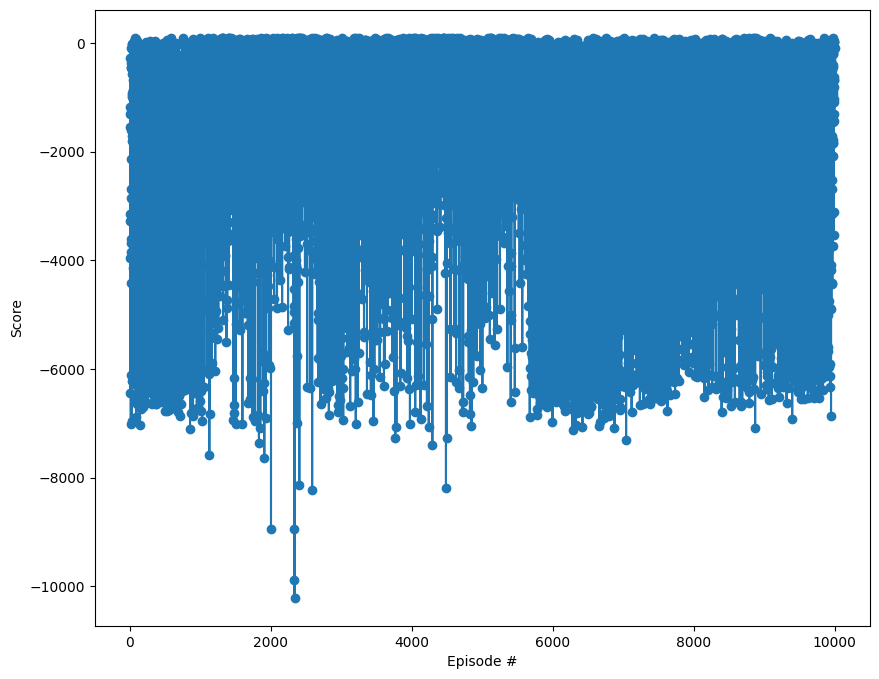

In [ ]:
# plot the scores
plt.plot(np.arange(1, len(scores)+1), scores, marker='o')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
model = PG(input_shape=state_size, num_actions=action_size).to(device)
model.load_state_dict(torch.load('/content/drive/My Drive/pg_model_weights.pth'))


from tqdm import tqdm

env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))
video_filename = '/content/vid.mp4'
max_steps = 100
# Evaluation
with imageio.get_writer(video_filename, fps=10) as video:
  obs = env.reset()[0]
  done = False
  for step in tqdm(range(max_steps)):
    action, _ = model.act(obs)
    new_obs, reward, done, _, _ = env.step(action)
    video.append_data(env.render())
    obs = new_obs
    if done:
      print("done","reward=", total_reward,"num_of_steps=",step)
      break
embed_mp4(video_filename)

 53%|█████▎    | 53/100 [00:01<00:01, 31.90it/s]


done reward= -683 num_of_steps= 53


In [ ]:
num_episodes = 100
steps_per_episode = []
rewards_per_episode = []
env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10(render_mode='rgb_array'))
max_steps = 100

# Run the episodes
for episode in range(num_episodes):
    obs = env.reset()[0]
    done = False
    total_reward = 0
    obs = obs.to(device)

    for step in tqdm(range(max_steps)):
        action, _ = model.act(obs)
        new_obs, reward, done, _, _ = env.step(action)
        obs = new_obs
        total_reward += reward

        if done:
            steps_per_episode.append(step)
            rewards_per_episode.append(total_reward)
            break

# Calculate average number of steps
average_steps = np.mean(steps_per_episode)
print("Average number of steps:", average_steps)

# Calculate average reward
average_reward = np.mean(rewards_per_episode)
print("Average reward:", average_reward)


100%|██████████| 100/100 [00:00<00:00, 140.48it/s]

Average number of steps: 45.516129032258064
Average reward: -147.51612903225808


## Actor Critic

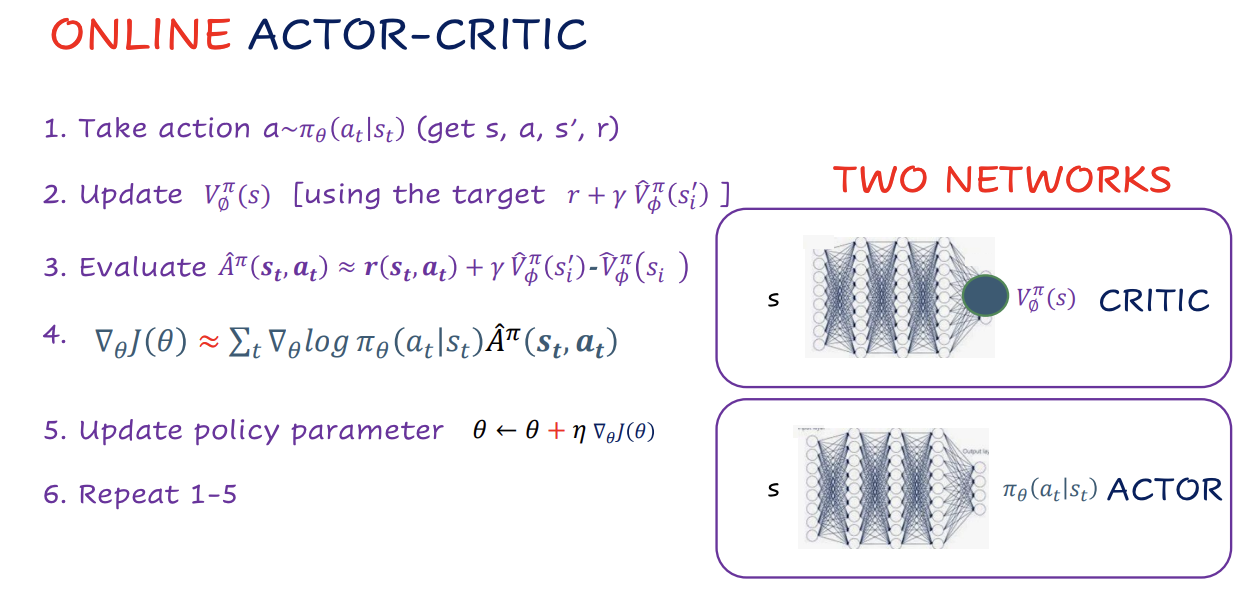

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical

class Actor(nn.Module):
    def __init__(self, input_shape, num_actions):
        super(Actor, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2),   # (84-3+1)/2 = 41, 1*84*84-> 16*41*41
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=4, stride=2), # (41-4+1)/2 = 19 16*41*41->32*19*19
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2), # (19-4+1)/2 = 8 32*18*19 -> 64*8*8
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2), # (8-3+1)/2 = 3 64*8*8 -> 128*3*3
            nn.ReLU()
        )
        conv_out_size = self._get_conv_out(input_shape)
        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 512),
            nn.ReLU(),
            nn.Linear(512, num_actions)
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(torch.prod(torch.tensor(o.size())))

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = F.softmax(self.fc(x), dim=-1)
        return x

    def act(self, state):
        device = next(self.parameters()).device
        state = state.to(device).unsqueeze(0)
        probs = self.forward(state)
        m = Categorical(probs) #Creates a categorical distribution parameterized by either probs
        action = m.sample() # sample from the disterbution
        return action.item(), m.log_prob(action)


In [ ]:

class Critic(nn.Module):
    def __init__(self, input_shape):
        super(Critic, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2),   # (84-3+1)/2 = 41, 1*84*84-> 16*41*41
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=4, stride=2), # (41-4+1)/2 = 19 16*41*41->32*19*19
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2), # (19-4+1)/2 = 8 32*18*19 -> 64*8*8
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2), # (8-3+1)/2 = 3 64*8*8 -> 128*3*3
            nn.ReLU()
        )
        conv_out_size = self._get_conv_out(input_shape)
        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(torch.prod(torch.tensor(o.size())))

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [ ]:
from tqdm import tqdm
from collections import deque
import imageio

def train(actor_model, critic_model, actor_optimizer, critic_optimizer, env, n_episodes=1000, max_t=1000, gamma=0.99, print_every=100, device='cpu'):
    scores_deque = deque(maxlen=100) # saves the last 100 scores (sum of all rewards)
    scores = []
    for i_episode in tqdm(range(1, n_episodes+1)):
        saved_log_probs = []
        rewards = []
        critic_preds = []
        critic_targets = []
        state = env.reset()[0] #reset game
        # get expirience - play the game
        for t in range(max_t):
            # 1. take action based on the actor model
            action, log_prob = actor_model.act(state) # the action and the log_prob for the action
            # get s', r, d
            next_state, reward, done, _ , _ = env.step(action)
            next_value = critic_model(next_state.to(device)[None])
            target = reward + gamma * next_value
            pred = critic_model(state.to(device)[None])
            critic_targets.append(target)
            critic_preds.append(pred)
            a = reward + gamma * next_value.detach() - pred.detach()
            saved_log_probs.append(-log_prob*a)
            rewards.append(reward)
            if done:
                break
            state = next_state

        # 2. update critic model using the target: r+gamma*(critic_model(s'))
        critic_preds = torch.cat(critic_preds)
        critic_targets = torch.cat(critic_targets)
        critic_loss = F.mse_loss(critic_preds, critic_targets)
        critic_optimizer.zero_grad()
        critic_loss.backward()
        critic_optimizer.step()

        # 3. evaluate r + gamma*critic_model(next_s)-critic_model(s)
        actor_loss = torch.cat(saved_log_probs).sum()
        # 4. update actor model using the actor_loss
        actor_optimizer.zero_grad()
        actor_loss.backward()
        actor_optimizer.step()

        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        if i_episode % print_every == 0:
            print(f'Episode {i_episode}\tAverage Score: {np.mean(scores_deque):.2f}')
    return scores

In [ ]:
import gym

# Initialize env
env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))

# Environment details
obs = env.reset()[0]
state_size = obs.shape
action_size = env.action_space.n

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Initialize actor and critics models
actor_model = Actor(input_shape=state_size, num_actions=action_size).to(device)
critic_model = Critic(input_shape=state_size).to(device)

# Optimizeres
actor_optimizer = optim.Adam(actor_model.parameters(), lr=1e-2)
critic_optimizer = optim.Adam(critic_model.parameters(), lr=1e-3)

# train
scores = train(actor_model, critic_model, actor_optimizer, critic_optimizer, env, n_episodes=10000, max_t=800, gamma=0.99, print_every=10, device=device)


cpu


  0%|          | 10/10000 [01:21<15:43:45,  5.67s/it]

Episode 10	Average Score: -3732.80


  0%|          | 21/10000 [02:05<13:05:38,  4.72s/it]

Episode 20	Average Score: -2796.75


  0%|          | 30/10000 [02:45<6:20:57,  2.29s/it]

Episode 30	Average Score: -2337.67


  0%|          | 40/10000 [03:36<18:23:38,  6.65s/it]

Episode 40	Average Score: -2318.88


  0%|          | 50/10000 [04:18<9:45:42,  3.53s/it] 

Episode 50	Average Score: -2123.08


  1%|          | 60/10000 [04:44<5:16:39,  1.91s/it]

Episode 60	Average Score: -1938.92


  1%|          | 70/10000 [05:27<16:13:37,  5.88s/it]

Episode 70	Average Score: -1886.96


  1%|          | 80/10000 [06:31<15:09:06,  5.50s/it]

Episode 80	Average Score: -1930.11


  1%|          | 90/10000 [07:02<6:18:10,  2.29s/it]

Episode 90	Average Score: -1845.89


  1%|          | 100/10000 [07:33<4:52:43,  1.77s/it]

Episode 100	Average Score: -1776.95


  1%|          | 110/10000 [08:31<17:49:43,  6.49s/it]

Episode 110	Average Score: -1637.99


  1%|          | 120/10000 [09:05<9:13:06,  3.36s/it]

Episode 120	Average Score: -1573.52


  1%|▏         | 130/10000 [09:40<13:44:34,  5.01s/it]

Episode 130	Average Score: -1568.17


  1%|▏         | 140/10000 [10:24<10:51:12,  3.96s/it]

Episode 140	Average Score: -1517.92


  2%|▏         | 150/10000 [11:22<17:24:19,  6.36s/it]

Episode 150	Average Score: -1601.00


  2%|▏         | 160/10000 [12:00<10:29:58,  3.84s/it]

Episode 160	Average Score: -1639.29


  2%|▏         | 170/10000 [12:29<5:53:45,  2.16s/it]

Episode 170	Average Score: -1599.68


  2%|▏         | 180/10000 [12:50<4:55:39,  1.81s/it]

Episode 180	Average Score: -1445.20


  2%|▏         | 190/10000 [13:10<4:42:48,  1.73s/it]

Episode 190	Average Score: -1411.10


  2%|▏         | 200/10000 [13:31<8:38:21,  3.17s/it]

Episode 200	Average Score: -1385.30


  2%|▏         | 210/10000 [13:59<9:17:38,  3.42s/it] 

Episode 210	Average Score: -1257.52


  2%|▏         | 220/10000 [14:15<4:51:57,  1.79s/it]

Episode 220	Average Score: -1181.24


  2%|▏         | 230/10000 [14:25<2:34:29,  1.05it/s]

Episode 230	Average Score: -1083.89


  2%|▏         | 240/10000 [14:57<9:57:55,  3.68s/it] 

Episode 240	Average Score: -1052.25


  2%|▎         | 250/10000 [15:36<18:23:34,  6.79s/it]

Episode 250	Average Score: -977.25


  3%|▎         | 260/10000 [16:09<7:03:54,  2.61s/it]

Episode 260	Average Score: -948.26


  3%|▎         | 270/10000 [16:35<6:16:22,  2.32s/it]

Episode 270	Average Score: -938.21


  3%|▎         | 280/10000 [17:04<10:59:05,  4.07s/it]

Episode 280	Average Score: -978.65


  3%|▎         | 290/10000 [17:46<14:12:49,  5.27s/it]

Episode 290	Average Score: -1054.46


  3%|▎         | 300/10000 [19:07<24:54:37,  9.25s/it]

Episode 300	Average Score: -1235.79


  3%|▎         | 310/10000 [20:02<10:07:28,  3.76s/it]

Episode 310	Average Score: -1323.16


  3%|▎         | 320/10000 [20:29<6:47:19,  2.52s/it]

Episode 320	Average Score: -1386.51


  3%|▎         | 330/10000 [21:02<9:13:51,  3.44s/it]

Episode 330	Average Score: -1464.37


  3%|▎         | 340/10000 [21:34<10:36:28,  3.95s/it]

Episode 340	Average Score: -1444.93


  4%|▎         | 350/10000 [22:32<16:10:18,  6.03s/it]

Episode 350	Average Score: -1518.40


  4%|▎         | 360/10000 [23:39<22:20:24,  8.34s/it]

Episode 360	Average Score: -1658.75


  4%|▎         | 370/10000 [24:26<7:27:20,  2.79s/it]

Episode 370	Average Score: -1711.00


  4%|▍         | 380/10000 [24:57<9:37:51,  3.60s/it]

Episode 380	Average Score: -1714.41


  4%|▍         | 390/10000 [25:21<5:15:29,  1.97s/it]

Episode 390	Average Score: -1640.61


  4%|▍         | 400/10000 [25:48<9:17:25,  3.48s/it]

Episode 400	Average Score: -1476.58


  4%|▍         | 410/10000 [26:41<12:54:47,  4.85s/it]

Episode 410	Average Score: -1503.19


  4%|▍         | 420/10000 [27:05<9:27:36,  3.55s/it]

Episode 420	Average Score: -1467.82


  4%|▍         | 430/10000 [27:38<8:21:26,  3.14s/it] 

Episode 430	Average Score: -1461.25


  4%|▍         | 440/10000 [28:39<21:22:30,  8.05s/it]

Episode 440	Average Score: -1570.36


  4%|▍         | 450/10000 [29:21<12:58:28,  4.89s/it]

Episode 450	Average Score: -1504.64


  5%|▍         | 460/10000 [30:17<12:36:24,  4.76s/it]

Episode 460	Average Score: -1453.96


  5%|▍         | 470/10000 [31:09<12:07:54,  4.58s/it]

Episode 470	Average Score: -1487.47


  5%|▍         | 480/10000 [31:45<8:10:44,  3.09s/it] 

Episode 480	Average Score: -1503.12


  5%|▍         | 490/10000 [32:39<17:18:22,  6.55s/it]

Episode 490	Average Score: -1612.66


  5%|▌         | 500/10000 [33:00<5:09:32,  1.96s/it]

Episode 500	Average Score: -1576.09


  5%|▌         | 510/10000 [33:39<7:45:33,  2.94s/it] 

Episode 510	Average Score: -1514.03


  5%|▌         | 520/10000 [34:11<8:58:18,  3.41s/it]

Episode 520	Average Score: -1567.28


  5%|▌         | 530/10000 [35:13<14:18:03,  5.44s/it]

Episode 530	Average Score: -1689.57


  5%|▌         | 540/10000 [35:47<7:30:27,  2.86s/it]

Episode 540	Average Score: -1567.22


  6%|▌         | 550/10000 [36:08<3:11:38,  1.22s/it]

Episode 550	Average Score: -1494.42


  6%|▌         | 560/10000 [36:30<7:46:55,  2.97s/it]

Episode 560	Average Score: -1379.96


  6%|▌         | 570/10000 [36:55<4:26:34,  1.70s/it]

Episode 570	Average Score: -1281.71


  6%|▌         | 580/10000 [37:33<10:51:56,  4.15s/it]

Episode 580	Average Score: -1304.45


  6%|▌         | 590/10000 [37:55<4:34:01,  1.75s/it]

Episode 590	Average Score: -1186.98


  6%|▌         | 600/10000 [38:59<10:37:54,  4.07s/it]

Episode 600	Average Score: -1350.88


  6%|▌         | 610/10000 [39:40<8:38:24,  3.31s/it] 

Episode 610	Average Score: -1330.63


  6%|▌         | 620/10000 [40:00<4:55:45,  1.89s/it]

Episode 620	Average Score: -1266.08


  6%|▋         | 631/10000 [40:46<8:33:13,  3.29s/it] 

Episode 630	Average Score: -1206.74


  6%|▋         | 640/10000 [41:19<11:11:49,  4.31s/it]

Episode 640	Average Score: -1215.23


  6%|▋         | 650/10000 [42:08<11:49:53,  4.56s/it]

Episode 650	Average Score: -1310.89


  7%|▋         | 660/10000 [42:49<9:57:32,  3.84s/it] 

Episode 660	Average Score: -1374.57


  7%|▋         | 670/10000 [43:26<6:53:06,  2.66s/it]

Episode 670	Average Score: -1411.84


  7%|▋         | 680/10000 [43:47<4:08:38,  1.60s/it]

Episode 680	Average Score: -1336.83


  7%|▋         | 690/10000 [44:04<4:58:35,  1.92s/it]

Episode 690	Average Score: -1319.96


  7%|▋         | 700/10000 [44:20<4:41:52,  1.82s/it]

Episode 700	Average Score: -1146.89


  7%|▋         | 710/10000 [45:17<14:41:49,  5.70s/it]

Episode 710	Average Score: -1236.90


  7%|▋         | 720/10000 [45:55<5:26:48,  2.11s/it]

Episode 720	Average Score: -1306.71


  7%|▋         | 730/10000 [46:21<7:08:30,  2.77s/it]

Episode 730	Average Score: -1219.24


  7%|▋         | 740/10000 [46:37<3:25:09,  1.33s/it]

Episode 740	Average Score: -1157.43


  8%|▊         | 750/10000 [47:01<11:42:05,  4.55s/it]

Episode 750	Average Score: -1071.30


  8%|▊         | 760/10000 [47:30<11:13:05,  4.37s/it]

Episode 760	Average Score: -1026.74


  8%|▊         | 770/10000 [47:54<5:04:13,  1.98s/it]

Episode 770	Average Score: -987.63


  8%|▊         | 780/10000 [48:19<5:50:22,  2.28s/it]

Episode 780	Average Score: -999.96


  8%|▊         | 790/10000 [48:57<12:44:54,  4.98s/it]

Episode 790	Average Score: -1095.35


  8%|▊         | 800/10000 [49:25<8:56:43,  3.50s/it] 

Episode 800	Average Score: -1138.38


  8%|▊         | 810/10000 [49:56<7:39:21,  3.00s/it]

Episode 810	Average Score: -1011.20


  8%|▊         | 820/10000 [50:36<9:48:31,  3.85s/it] 

Episode 820	Average Score: -1019.24


  8%|▊         | 830/10000 [51:40<12:36:50,  4.95s/it]

Episode 830	Average Score: -1176.56


  8%|▊         | 840/10000 [52:07<8:35:50,  3.38s/it]

Episode 840	Average Score: -1211.73


  8%|▊         | 850/10000 [52:22<4:43:15,  1.86s/it]

Episode 850	Average Score: -1164.67


  9%|▊         | 860/10000 [53:13<13:02:57,  5.14s/it]

Episode 860	Average Score: -1263.84


  9%|▊         | 870/10000 [54:03<10:08:46,  4.00s/it]

Episode 870	Average Score: -1353.26


  9%|▉         | 880/10000 [54:50<8:58:33,  3.54s/it]

Episode 880	Average Score: -1422.66


  9%|▉         | 890/10000 [55:27<9:29:43,  3.75s/it] 

Episode 890	Average Score: -1399.42


  9%|▉         | 900/10000 [56:11<9:56:58,  3.94s/it] 

Episode 900	Average Score: -1467.64


  9%|▉         | 910/10000 [56:42<9:02:28,  3.58s/it]

Episode 910	Average Score: -1469.56


  9%|▉         | 920/10000 [57:16<5:44:09,  2.27s/it]

Episode 920	Average Score: -1454.24


  9%|▉         | 930/10000 [57:37<4:19:46,  1.72s/it]

Episode 930	Average Score: -1281.08


  9%|▉         | 940/10000 [58:16<9:07:53,  3.63s/it] 

Episode 940	Average Score: -1319.27


 10%|▉         | 950/10000 [58:45<9:54:49,  3.94s/it] 

Episode 950	Average Score: -1390.87


 10%|▉         | 960/10000 [59:08<6:12:46,  2.47s/it]

Episode 960	Average Score: -1269.39


 10%|▉         | 970/10000 [59:41<10:57:37,  4.37s/it]

Episode 970	Average Score: -1204.53


 10%|▉         | 980/10000 [1:00:15<9:38:49,  3.85s/it]

Episode 980	Average Score: -1155.46


 10%|▉         | 990/10000 [1:00:22<1:36:47,  1.55it/s]

Episode 990	Average Score: -1039.91


 10%|█         | 1000/10000 [1:00:55<11:03:09,  4.42s/it]

Episode 1000	Average Score: -999.49


 10%|█         | 1010/10000 [1:01:13<6:18:25,  2.53s/it]

Episode 1010	Average Score: -959.49


 10%|█         | 1020/10000 [1:01:33<5:49:34,  2.34s/it]

Episode 1020	Average Score: -903.06


 10%|█         | 1030/10000 [1:01:52<2:53:31,  1.16s/it]

Episode 1030	Average Score: -900.61


 10%|█         | 1040/10000 [1:02:18<7:34:01,  3.04s/it]

Episode 1040	Average Score: -867.45


 10%|█         | 1050/10000 [1:02:52<9:38:25,  3.88s/it] 

Episode 1050	Average Score: -878.53


 11%|█         | 1060/10000 [1:03:36<10:42:37,  4.31s/it]

Episode 1060	Average Score: -960.74


 11%|█         | 1070/10000 [1:04:03<6:57:19,  2.80s/it]

Episode 1070	Average Score: -954.44


 11%|█         | 1080/10000 [1:04:34<11:01:07,  4.45s/it]

Episode 1080	Average Score: -966.28


 11%|█         | 1090/10000 [1:05:07<9:08:43,  3.70s/it]

Episode 1090	Average Score: -1058.11


 11%|█         | 1100/10000 [1:05:56<15:34:34,  6.30s/it]

Episode 1100	Average Score: -1103.89


 11%|█         | 1110/10000 [1:06:20<8:41:18,  3.52s/it]

Episode 1110	Average Score: -1132.65


 11%|█         | 1120/10000 [1:06:51<5:08:19,  2.08s/it]

Episode 1120	Average Score: -1179.18


 11%|█▏        | 1130/10000 [1:07:22<5:27:08,  2.21s/it]

Episode 1130	Average Score: -1207.92


 11%|█▏        | 1140/10000 [1:07:51<6:27:44,  2.63s/it]

Episode 1140	Average Score: -1216.38


 12%|█▏        | 1150/10000 [1:08:23<10:10:41,  4.14s/it]

Episode 1150	Average Score: -1226.20


 12%|█▏        | 1160/10000 [1:08:57<8:58:36,  3.66s/it] 

Episode 1160	Average Score: -1197.52


 12%|█▏        | 1170/10000 [1:09:37<7:17:54,  2.98s/it]

Episode 1170	Average Score: -1231.49


 12%|█▏        | 1180/10000 [1:10:06<6:46:41,  2.77s/it]

Episode 1180	Average Score: -1220.83


 12%|█▏        | 1190/10000 [1:10:41<6:46:30,  2.77s/it]

Episode 1190	Average Score: -1246.94


 12%|█▏        | 1200/10000 [1:11:28<18:47:24,  7.69s/it]

Episode 1200	Average Score: -1239.78


 12%|█▏        | 1210/10000 [1:12:17<12:03:44,  4.94s/it]

Episode 1210	Average Score: -1342.06


 12%|█▏        | 1220/10000 [1:13:21<16:08:23,  6.62s/it]

Episode 1220	Average Score: -1453.95


 12%|█▏        | 1230/10000 [1:14:03<11:03:23,  4.54s/it]

Episode 1230	Average Score: -1501.56


 12%|█▏        | 1240/10000 [1:14:37<5:52:22,  2.41s/it]

Episode 1240	Average Score: -1496.85


 12%|█▎        | 1250/10000 [1:15:00<5:41:53,  2.34s/it]

Episode 1250	Average Score: -1457.91


 13%|█▎        | 1260/10000 [1:15:51<12:58:10,  5.34s/it]

Episode 1260	Average Score: -1519.64


 13%|█▎        | 1270/10000 [1:16:27<10:50:36,  4.47s/it]

Episode 1270	Average Score: -1504.80


 13%|█▎        | 1280/10000 [1:16:58<9:29:55,  3.92s/it]

Episode 1280	Average Score: -1494.78


 13%|█▎        | 1290/10000 [1:17:37<12:32:04,  5.18s/it]

Episode 1290	Average Score: -1492.26


 13%|█▎        | 1300/10000 [1:18:07<9:10:10,  3.79s/it]

Episode 1300	Average Score: -1422.08


 13%|█▎        | 1310/10000 [1:18:37<11:59:02,  4.96s/it]

Episode 1310	Average Score: -1332.30


 13%|█▎        | 1320/10000 [1:19:01<5:11:55,  2.16s/it]

Episode 1320	Average Score: -1186.12


 13%|█▎        | 1330/10000 [1:19:33<8:07:33,  3.37s/it]

Episode 1330	Average Score: -1172.54


 13%|█▎        | 1340/10000 [1:20:29<15:48:04,  6.57s/it]

Episode 1340	Average Score: -1282.96


 14%|█▎        | 1350/10000 [1:21:02<6:18:44,  2.63s/it]

Episode 1350	Average Score: -1304.47


 14%|█▎        | 1360/10000 [1:21:44<14:25:30,  6.01s/it]

Episode 1360	Average Score: -1251.13


 14%|█▎        | 1370/10000 [1:22:21<3:51:37,  1.61s/it]

Episode 1370	Average Score: -1242.14


 14%|█▍        | 1380/10000 [1:22:44<4:38:02,  1.94s/it]

Episode 1380	Average Score: -1217.47


 14%|█▍        | 1390/10000 [1:23:14<6:58:25,  2.92s/it]

Episode 1390	Average Score: -1200.78


 14%|█▍        | 1400/10000 [1:23:50<4:41:34,  1.96s/it]

Episode 1400	Average Score: -1224.66


 14%|█▍        | 1410/10000 [1:24:22<5:33:11,  2.33s/it]

Episode 1410	Average Score: -1229.73


 14%|█▍        | 1420/10000 [1:24:59<6:44:58,  2.83s/it]

Episode 1420	Average Score: -1290.48


 14%|█▍        | 1430/10000 [1:25:40<9:03:48,  3.81s/it]

Episode 1430	Average Score: -1298.42


 14%|█▍        | 1440/10000 [1:26:02<4:14:05,  1.78s/it]

Episode 1440	Average Score: -1161.01


 14%|█▍        | 1450/10000 [1:26:46<16:16:53,  6.86s/it]

Episode 1450	Average Score: -1213.89


 15%|█▍        | 1460/10000 [1:27:06<2:44:02,  1.15s/it]

Episode 1460	Average Score: -1138.79


 15%|█▍        | 1470/10000 [1:27:23<5:04:09,  2.14s/it]

Episode 1470	Average Score: -1070.72


 15%|█▍        | 1480/10000 [1:27:58<6:54:34,  2.92s/it]

Episode 1480	Average Score: -1111.23


 15%|█▍        | 1490/10000 [1:28:36<13:36:43,  5.76s/it]

Episode 1490	Average Score: -1142.61


 15%|█▌        | 1500/10000 [1:29:16<9:39:15,  4.09s/it] 

Episode 1500	Average Score: -1171.40


 15%|█▌        | 1510/10000 [1:29:55<8:23:50,  3.56s/it] 

Episode 1510	Average Score: -1205.99


 15%|█▌        | 1520/10000 [1:30:31<8:20:50,  3.54s/it]

Episode 1520	Average Score: -1191.45


 15%|█▌        | 1530/10000 [1:31:11<8:23:11,  3.56s/it] 

Episode 1530	Average Score: -1194.27


 15%|█▌        | 1540/10000 [1:31:51<9:41:02,  4.12s/it] 

Episode 1540	Average Score: -1264.91


 16%|█▌        | 1550/10000 [1:32:50<11:28:45,  4.89s/it]

Episode 1550	Average Score: -1315.98


 16%|█▌        | 1560/10000 [1:33:19<9:21:33,  3.99s/it] 

Episode 1560	Average Score: -1357.25


 16%|█▌        | 1570/10000 [1:33:40<5:40:21,  2.42s/it]

Episode 1570	Average Score: -1383.97


 16%|█▌        | 1580/10000 [1:34:13<7:53:01,  3.37s/it]

Episode 1580	Average Score: -1391.00


 16%|█▌        | 1590/10000 [1:34:40<6:25:32,  2.75s/it]

Episode 1590	Average Score: -1338.09


 16%|█▌        | 1600/10000 [1:35:07<4:40:50,  2.01s/it]

Episode 1600	Average Score: -1279.38


 16%|█▌        | 1610/10000 [1:35:45<9:29:12,  4.07s/it]

Episode 1610	Average Score: -1280.10


 16%|█▌        | 1620/10000 [1:36:18<8:52:11,  3.81s/it] 

Episode 1620	Average Score: -1277.55


 16%|█▋        | 1630/10000 [1:37:00<14:18:47,  6.16s/it]

Episode 1630	Average Score: -1293.07


 16%|█▋        | 1640/10000 [1:37:20<5:00:48,  2.16s/it]

Episode 1640	Average Score: -1208.51


 16%|█▋        | 1650/10000 [1:38:22<14:53:43,  6.42s/it]

Episode 1650	Average Score: -1220.32


 17%|█▋        | 1660/10000 [1:39:21<15:14:35,  6.58s/it]

Episode 1660	Average Score: -1330.43


 17%|█▋        | 1670/10000 [1:39:48<8:31:12,  3.68s/it]

Episode 1670	Average Score: -1341.66


 17%|█▋        | 1680/10000 [1:40:28<10:04:32,  4.36s/it]

Episode 1680	Average Score: -1371.93


 17%|█▋        | 1690/10000 [1:41:03<7:35:51,  3.29s/it]

Episode 1690	Average Score: -1409.01


 17%|█▋        | 1700/10000 [1:41:50<8:59:52,  3.90s/it]

Episode 1700	Average Score: -1466.93


 17%|█▋        | 1710/10000 [1:42:21<6:39:47,  2.89s/it]

Episode 1710	Average Score: -1432.69


 17%|█▋        | 1720/10000 [1:42:57<11:13:09,  4.88s/it]

Episode 1720	Average Score: -1465.64


 17%|█▋        | 1730/10000 [1:43:22<3:49:41,  1.67s/it]

Episode 1730	Average Score: -1395.90


 17%|█▋        | 1740/10000 [1:43:42<5:39:55,  2.47s/it]

Episode 1740	Average Score: -1400.99


 18%|█▊        | 1750/10000 [1:44:10<6:02:02,  2.63s/it]

Episode 1750	Average Score: -1277.14


 18%|█▊        | 1760/10000 [1:45:12<9:13:45,  4.03s/it] 

Episode 1760	Average Score: -1289.88


 18%|█▊        | 1770/10000 [1:45:57<10:05:44,  4.42s/it]

Episode 1770	Average Score: -1365.30


 18%|█▊        | 1780/10000 [1:46:29<6:18:52,  2.77s/it]

Episode 1780	Average Score: -1312.63


 18%|█▊        | 1790/10000 [1:47:02<9:05:13,  3.98s/it] 

Episode 1790	Average Score: -1306.06


 18%|█▊        | 1800/10000 [1:48:10<13:15:25,  5.82s/it]

Episode 1800	Average Score: -1396.22


 18%|█▊        | 1810/10000 [1:49:05<12:22:47,  5.44s/it]

Episode 1810	Average Score: -1472.95


 18%|█▊        | 1820/10000 [1:49:40<8:33:56,  3.77s/it] 

Episode 1820	Average Score: -1452.35


 18%|█▊        | 1830/10000 [1:50:16<8:22:05,  3.69s/it] 

Episode 1830	Average Score: -1497.02


 18%|█▊        | 1840/10000 [1:50:48<8:13:37,  3.63s/it]

Episode 1840	Average Score: -1556.63


 18%|█▊        | 1850/10000 [1:51:15<4:47:31,  2.12s/it]

Episode 1850	Average Score: -1532.35


 19%|█▊        | 1860/10000 [1:51:45<5:51:43,  2.59s/it]

Episode 1860	Average Score: -1408.43


 19%|█▊        | 1870/10000 [1:52:46<13:58:48,  6.19s/it]

Episode 1870	Average Score: -1472.98


 19%|█▉        | 1880/10000 [1:53:19<10:29:51,  4.65s/it]

Episode 1880	Average Score: -1482.76


 19%|█▉        | 1890/10000 [1:53:57<7:47:18,  3.46s/it]

Episode 1890	Average Score: -1498.77


 19%|█▉        | 1900/10000 [1:54:36<6:25:45,  2.86s/it]

Episode 1900	Average Score: -1392.41


 19%|█▉        | 1910/10000 [1:55:24<13:00:36,  5.79s/it]

Episode 1910	Average Score: -1374.10


 19%|█▉        | 1920/10000 [1:56:01<7:12:37,  3.21s/it]

Episode 1920	Average Score: -1364.58


 19%|█▉        | 1930/10000 [1:56:38<8:16:56,  3.69s/it] 

Episode 1930	Average Score: -1356.94


 19%|█▉        | 1940/10000 [1:57:07<5:21:53,  2.40s/it]

Episode 1940	Average Score: -1324.04


 20%|█▉        | 1950/10000 [1:57:42<5:17:47,  2.37s/it]

Episode 1950	Average Score: -1368.23


 20%|█▉        | 1960/10000 [1:58:15<8:27:09,  3.78s/it]

Episode 1960	Average Score: -1370.51


 20%|█▉        | 1970/10000 [1:58:53<15:17:48,  6.86s/it]

Episode 1970	Average Score: -1281.89


 20%|█▉        | 1980/10000 [1:59:36<9:46:26,  4.39s/it]

Episode 1980	Average Score: -1321.00


 20%|█▉        | 1990/10000 [2:00:18<10:51:25,  4.88s/it]

Episode 1990	Average Score: -1325.66


 20%|██        | 2000/10000 [2:01:12<5:58:10,  2.69s/it]

Episode 2000	Average Score: -1379.46


 20%|██        | 2010/10000 [2:02:00<14:41:21,  6.62s/it]

Episode 2010	Average Score: -1370.63


 20%|██        | 2020/10000 [2:02:15<3:00:24,  1.36s/it]

Episode 2020	Average Score: -1286.85


 20%|██        | 2030/10000 [2:02:47<8:23:35,  3.79s/it]

Episode 2030	Average Score: -1262.52


 20%|██        | 2040/10000 [2:03:09<3:31:16,  1.59s/it]

Episode 2040	Average Score: -1246.68


 20%|██        | 2050/10000 [2:03:59<13:34:36,  6.15s/it]

Episode 2050	Average Score: -1304.36


 21%|██        | 2060/10000 [2:04:29<4:28:37,  2.03s/it]

Episode 2060	Average Score: -1296.40


 21%|██        | 2070/10000 [2:05:07<5:34:23,  2.53s/it]

Episode 2070	Average Score: -1284.73


 21%|██        | 2080/10000 [2:06:00<14:32:30,  6.61s/it]

Episode 2080	Average Score: -1333.57


 21%|██        | 2090/10000 [2:06:48<7:25:40,  3.38s/it]

Episode 2090	Average Score: -1361.55


 21%|██        | 2100/10000 [2:07:41<12:06:41,  5.52s/it]

Episode 2100	Average Score: -1353.31


 21%|██        | 2110/10000 [2:08:44<13:57:33,  6.37s/it]

Episode 2110	Average Score: -1401.90


 21%|██        | 2120/10000 [2:09:24<5:08:30,  2.35s/it]

Episode 2120	Average Score: -1492.23


 21%|██▏       | 2130/10000 [2:10:16<13:36:45,  6.23s/it]

Episode 2130	Average Score: -1555.11


 21%|██▏       | 2140/10000 [2:11:04<8:35:36,  3.94s/it] 

Episode 2140	Average Score: -1618.88


 22%|██▏       | 2150/10000 [2:11:46<11:18:13,  5.18s/it]

Episode 2150	Average Score: -1579.18


 22%|██▏       | 2160/10000 [2:12:43<16:56:44,  7.78s/it]

Episode 2160	Average Score: -1685.40


 22%|██▏       | 2170/10000 [2:13:05<4:17:43,  1.97s/it]

Episode 2170	Average Score: -1630.27


 22%|██▏       | 2180/10000 [2:13:30<3:41:34,  1.70s/it]

Episode 2180	Average Score: -1517.43


 22%|██▏       | 2190/10000 [2:14:08<6:28:59,  2.99s/it]

Episode 2190	Average Score: -1486.19


 22%|██▏       | 2200/10000 [2:15:01<9:45:21,  4.50s/it] 

Episode 2200	Average Score: -1491.34


 22%|██▏       | 2210/10000 [2:15:37<7:31:13,  3.48s/it] 

Episode 2210	Average Score: -1401.60


 22%|██▏       | 2220/10000 [2:16:03<5:10:00,  2.39s/it]

Episode 2220	Average Score: -1357.61


 22%|██▏       | 2230/10000 [2:16:30<5:03:59,  2.35s/it]

Episode 2230	Average Score: -1281.54


 22%|██▏       | 2240/10000 [2:17:20<7:03:32,  3.27s/it]

Episode 2240	Average Score: -1297.61


 23%|██▎       | 2251/10000 [2:18:13<7:35:47,  3.53s/it] 

Episode 2250	Average Score: -1328.89


 23%|██▎       | 2260/10000 [2:18:39<10:35:39,  4.93s/it]

Episode 2260	Average Score: -1190.77


 23%|██▎       | 2270/10000 [2:20:02<24:46:30, 11.54s/it]

Episode 2270	Average Score: -1319.26


 23%|██▎       | 2280/10000 [2:20:54<11:46:05,  5.49s/it]

Episode 2280	Average Score: -1436.74


 23%|██▎       | 2290/10000 [2:21:17<5:20:55,  2.50s/it]

Episode 2290	Average Score: -1380.72


 23%|██▎       | 2300/10000 [2:21:56<5:53:05,  2.75s/it]

Episode 2300	Average Score: -1335.04


 23%|██▎       | 2310/10000 [2:22:56<13:56:52,  6.53s/it]

Episode 2310	Average Score: -1448.65


 23%|██▎       | 2320/10000 [2:24:05<14:16:45,  6.69s/it]

Episode 2320	Average Score: -1637.00


 23%|██▎       | 2330/10000 [2:24:33<6:58:04,  3.27s/it]

Episode 2330	Average Score: -1650.74


 23%|██▎       | 2340/10000 [2:25:09<7:00:40,  3.30s/it]

Episode 2340	Average Score: -1629.08


 24%|██▎       | 2350/10000 [2:25:54<8:29:48,  4.00s/it] 

Episode 2350	Average Score: -1617.36


 24%|██▎       | 2360/10000 [2:26:20<4:30:27,  2.12s/it]

Episode 2360	Average Score: -1628.66


 24%|██▎       | 2370/10000 [2:26:58<7:34:24,  3.57s/it]

Episode 2370	Average Score: -1575.63


 24%|██▍       | 2380/10000 [2:27:32<5:07:17,  2.42s/it]

Episode 2380	Average Score: -1507.94


 24%|██▍       | 2390/10000 [2:28:01<5:36:37,  2.65s/it]

Episode 2390	Average Score: -1531.75


 24%|██▍       | 2400/10000 [2:28:29<6:21:28,  3.01s/it]

Episode 2400	Average Score: -1503.33


 24%|██▍       | 2410/10000 [2:28:59<6:52:31,  3.26s/it]

Episode 2410	Average Score: -1378.26


 24%|██▍       | 2420/10000 [2:29:35<9:31:34,  4.52s/it] 

Episode 2420	Average Score: -1247.60


 24%|██▍       | 2430/10000 [2:30:13<10:10:56,  4.84s/it]

Episode 2430	Average Score: -1293.44


 24%|██▍       | 2440/10000 [2:30:48<3:56:47,  1.88s/it]

Episode 2440	Average Score: -1280.38


 24%|██▍       | 2450/10000 [2:31:15<6:53:13,  3.28s/it]

Episode 2450	Average Score: -1211.69


 25%|██▍       | 2460/10000 [2:31:57<8:39:39,  4.14s/it]

Episode 2460	Average Score: -1287.59


 25%|██▍       | 2470/10000 [2:32:17<5:27:09,  2.61s/it]

Episode 2470	Average Score: -1213.84


 25%|██▍       | 2480/10000 [2:32:56<7:22:01,  3.53s/it] 

Episode 2480	Average Score: -1229.65


 25%|██▍       | 2490/10000 [2:33:20<4:37:06,  2.21s/it]

Episode 2490	Average Score: -1208.00


 25%|██▌       | 2500/10000 [2:33:52<5:48:49,  2.79s/it]

Episode 2500	Average Score: -1222.07


 25%|██▌       | 2510/10000 [2:35:01<12:32:20,  6.03s/it]

Episode 2510	Average Score: -1377.88


 25%|██▌       | 2520/10000 [2:36:13<16:42:03,  8.04s/it]

Episode 2520	Average Score: -1505.42


 25%|██▌       | 2530/10000 [2:37:15<17:58:11,  8.66s/it]

Episode 2530	Average Score: -1591.10


 25%|██▌       | 2540/10000 [2:37:44<8:30:44,  4.11s/it]

Episode 2540	Average Score: -1570.16


 26%|██▌       | 2550/10000 [2:38:14<6:33:16,  3.17s/it]

Episode 2550	Average Score: -1593.26


 26%|██▌       | 2560/10000 [2:39:08<11:52:50,  5.75s/it]

Episode 2560	Average Score: -1626.78


 26%|██▌       | 2570/10000 [2:39:46<7:40:39,  3.72s/it]

Episode 2570	Average Score: -1688.42


 26%|██▌       | 2580/10000 [2:40:24<5:01:34,  2.44s/it]

Episode 2580	Average Score: -1690.43


 26%|██▌       | 2590/10000 [2:41:06<8:56:40,  4.35s/it] 

Episode 2590	Average Score: -1777.45


 26%|██▌       | 2600/10000 [2:41:40<11:05:58,  5.40s/it]

Episode 2600	Average Score: -1788.39


 26%|██▌       | 2610/10000 [2:42:17<8:10:13,  3.98s/it] 

Episode 2610	Average Score: -1659.62


 26%|██▌       | 2620/10000 [2:42:58<11:10:25,  5.45s/it]

Episode 2620	Average Score: -1531.81


 26%|██▋       | 2630/10000 [2:43:31<5:14:24,  2.56s/it]

Episode 2630	Average Score: -1425.91


 26%|██▋       | 2640/10000 [2:44:10<4:49:31,  2.36s/it]

Episode 2640	Average Score: -1467.70


 26%|██▋       | 2650/10000 [2:44:42<8:05:43,  3.97s/it]

Episode 2650	Average Score: -1454.04


 27%|██▋       | 2660/10000 [2:45:36<8:53:49,  4.36s/it]

Episode 2660	Average Score: -1470.19


 27%|██▋       | 2670/10000 [2:45:58<4:38:53,  2.28s/it]

Episode 2670	Average Score: -1404.46


 27%|██▋       | 2680/10000 [2:46:37<9:07:37,  4.49s/it]

Episode 2680	Average Score: -1403.82


 27%|██▋       | 2690/10000 [2:47:11<8:33:33,  4.22s/it]

Episode 2690	Average Score: -1351.47


 27%|██▋       | 2700/10000 [2:47:47<5:57:19,  2.94s/it]

Episode 2700	Average Score: -1350.40


 27%|██▋       | 2710/10000 [2:48:22<7:21:15,  3.63s/it]

Episode 2710	Average Score: -1351.34


 27%|██▋       | 2720/10000 [2:49:03<7:35:24,  3.75s/it]

Episode 2720	Average Score: -1365.65


 27%|██▋       | 2730/10000 [2:49:36<7:14:58,  3.59s/it]

Episode 2730	Average Score: -1367.77


 27%|██▋       | 2740/10000 [2:50:20<6:47:13,  3.37s/it]

Episode 2740	Average Score: -1394.48


 28%|██▊       | 2750/10000 [2:51:27<9:52:28,  4.90s/it] 

Episode 2750	Average Score: -1577.89


 28%|██▊       | 2760/10000 [2:52:12<11:31:59,  5.73s/it]

Episode 2760	Average Score: -1529.89


 28%|██▊       | 2770/10000 [2:52:31<4:03:35,  2.02s/it]

Episode 2770	Average Score: -1521.64


 28%|██▊       | 2780/10000 [2:53:18<6:00:15,  2.99s/it]

Episode 2780	Average Score: -1566.45


 28%|██▊       | 2790/10000 [2:54:04<6:43:56,  3.36s/it]

Episode 2790	Average Score: -1609.35


 28%|██▊       | 2800/10000 [2:54:40<8:25:32,  4.21s/it]

Episode 2800	Average Score: -1623.66


 28%|██▊       | 2810/10000 [2:55:11<11:09:39,  5.59s/it]

Episode 2810	Average Score: -1597.76


 28%|██▊       | 2820/10000 [2:56:10<13:05:23,  6.56s/it]

Episode 2820	Average Score: -1666.28


 28%|██▊       | 2830/10000 [2:57:12<10:15:10,  5.15s/it]

Episode 2830	Average Score: -1771.26


 28%|██▊       | 2840/10000 [2:57:37<4:06:02,  2.06s/it]

Episode 2840	Average Score: -1704.97


 28%|██▊       | 2850/10000 [2:58:04<4:26:24,  2.24s/it]

Episode 2850	Average Score: -1513.68


 29%|██▊       | 2860/10000 [2:58:22<2:08:23,  1.08s/it]

Episode 2860	Average Score: -1414.30


 29%|██▊       | 2870/10000 [2:59:11<6:08:22,  3.10s/it]

Episode 2870	Average Score: -1541.27


 29%|██▉       | 2880/10000 [2:59:41<5:34:16,  2.82s/it]

Episode 2880	Average Score: -1443.41


 29%|██▉       | 2890/10000 [3:00:24<5:34:41,  2.82s/it]

Episode 2890	Average Score: -1445.50


 29%|██▉       | 2900/10000 [3:01:26<13:59:43,  7.10s/it]

Episode 2900	Average Score: -1517.49


 29%|██▉       | 2910/10000 [3:01:53<5:12:49,  2.65s/it]

Episode 2910	Average Score: -1501.57


 29%|██▉       | 2920/10000 [3:02:43<8:33:10,  4.35s/it] 

Episode 2920	Average Score: -1458.97


 29%|██▉       | 2930/10000 [3:03:21<9:07:37,  4.65s/it]

Episode 2930	Average Score: -1368.03


 29%|██▉       | 2940/10000 [3:04:08<9:13:11,  4.70s/it]

Episode 2940	Average Score: -1429.84


 30%|██▉       | 2950/10000 [3:04:43<7:41:31,  3.93s/it]

Episode 2950	Average Score: -1453.38


 30%|██▉       | 2960/10000 [3:05:13<5:16:41,  2.70s/it]

Episode 2960	Average Score: -1500.64


 30%|██▉       | 2970/10000 [3:05:44<5:48:47,  2.98s/it]

Episode 2970	Average Score: -1423.46


 30%|██▉       | 2980/10000 [3:06:20<7:25:45,  3.81s/it]

Episode 2980	Average Score: -1452.98


 30%|██▉       | 2990/10000 [3:07:02<10:15:17,  5.27s/it]

Episode 2990	Average Score: -1455.09


 30%|███       | 3000/10000 [3:07:44<10:04:13,  5.18s/it]

Episode 3000	Average Score: -1390.04


 30%|███       | 3010/10000 [3:08:26<7:23:45,  3.81s/it]

Episode 3010	Average Score: -1444.43


 30%|███       | 3020/10000 [3:09:05<7:44:15,  3.99s/it]

Episode 3020	Average Score: -1406.32


 30%|███       | 3030/10000 [3:09:52<8:06:38,  4.19s/it]

Episode 3030	Average Score: -1444.69


 30%|███       | 3040/10000 [3:10:52<9:05:50,  4.71s/it] 

Episode 3040	Average Score: -1499.20


 30%|███       | 3050/10000 [3:11:23<4:57:52,  2.57s/it]

Episode 3050	Average Score: -1499.34


 31%|███       | 3060/10000 [3:11:48<2:59:12,  1.55s/it]

Episode 3060	Average Score: -1483.42


 31%|███       | 3070/10000 [3:12:28<6:58:05,  3.62s/it]

Episode 3070	Average Score: -1514.74


 31%|███       | 3080/10000 [3:13:12<8:02:57,  4.19s/it]

Episode 3080	Average Score: -1559.64


 31%|███       | 3090/10000 [3:13:41<6:25:14,  3.35s/it]

Episode 3090	Average Score: -1501.67


 31%|███       | 3100/10000 [3:14:09<3:58:21,  2.07s/it]

Episode 3100	Average Score: -1448.61


 31%|███       | 3110/10000 [3:14:44<10:02:54,  5.25s/it]

Episode 3110	Average Score: -1437.94


 31%|███       | 3120/10000 [3:15:28<8:45:01,  4.58s/it]

Episode 3120	Average Score: -1472.47


 31%|███▏      | 3130/10000 [3:16:38<19:49:27, 10.39s/it]

Episode 3130	Average Score: -1543.43


 31%|███▏      | 3140/10000 [3:17:16<7:14:56,  3.80s/it]

Episode 3140	Average Score: -1462.90


 32%|███▏      | 3150/10000 [3:17:35<4:04:18,  2.14s/it]

Episode 3150	Average Score: -1413.01


 32%|███▏      | 3160/10000 [3:18:00<7:52:13,  4.14s/it]

Episode 3160	Average Score: -1404.89


 32%|███▏      | 3170/10000 [3:18:41<6:13:32,  3.28s/it]

Episode 3170	Average Score: -1386.66


 32%|███▏      | 3180/10000 [3:19:12<4:45:18,  2.51s/it]

Episode 3180	Average Score: -1311.04


 32%|███▏      | 3190/10000 [3:20:15<14:51:37,  7.86s/it]

Episode 3190	Average Score: -1434.31


 32%|███▏      | 3200/10000 [3:20:55<8:39:48,  4.59s/it]

Episode 3200	Average Score: -1464.63


 32%|███▏      | 3210/10000 [3:21:35<8:41:20,  4.61s/it]

Episode 3210	Average Score: -1463.24


 32%|███▏      | 3220/10000 [3:22:15<11:25:12,  6.06s/it]

Episode 3220	Average Score: -1426.06


 32%|███▏      | 3230/10000 [3:22:48<8:23:22,  4.46s/it]

Episode 3230	Average Score: -1295.62


 32%|███▏      | 3240/10000 [3:23:29<7:38:18,  4.07s/it]

Episode 3240	Average Score: -1293.91


 32%|███▎      | 3250/10000 [3:24:19<7:22:53,  3.94s/it] 

Episode 3250	Average Score: -1427.83


 33%|███▎      | 3260/10000 [3:24:46<6:39:21,  3.56s/it]

Episode 3260	Average Score: -1428.78


 33%|███▎      | 3270/10000 [3:25:22<7:33:24,  4.04s/it]

Episode 3270	Average Score: -1433.30


 33%|███▎      | 3280/10000 [3:26:14<6:54:14,  3.70s/it]

Episode 3280	Average Score: -1516.65


 33%|███▎      | 3290/10000 [3:27:03<7:28:30,  4.01s/it]

Episode 3290	Average Score: -1468.70


 33%|███▎      | 3300/10000 [3:27:39<5:11:52,  2.79s/it]

Episode 3300	Average Score: -1463.11


 33%|███▎      | 3310/10000 [3:28:22<6:05:16,  3.28s/it]

Episode 3310	Average Score: -1489.17


 33%|███▎      | 3320/10000 [3:29:03<7:46:01,  4.19s/it]

Episode 3320	Average Score: -1501.66


 33%|███▎      | 3330/10000 [3:29:54<8:46:04,  4.73s/it] 

Episode 3330	Average Score: -1568.91


 33%|███▎      | 3340/10000 [3:30:10<4:57:21,  2.68s/it]

Episode 3340	Average Score: -1482.67


 34%|███▎      | 3350/10000 [3:31:06<11:15:01,  6.09s/it]

Episode 3350	Average Score: -1492.60


 34%|███▎      | 3360/10000 [3:31:51<7:52:24,  4.27s/it]

Episode 3360	Average Score: -1565.01


 34%|███▎      | 3370/10000 [3:32:32<5:14:38,  2.85s/it]

Episode 3370	Average Score: -1574.77


 34%|███▍      | 3380/10000 [3:33:41<18:25:09, 10.02s/it]

Episode 3380	Average Score: -1673.62


 34%|███▍      | 3390/10000 [3:34:09<6:52:54,  3.75s/it]

Episode 3390	Average Score: -1585.03


 34%|███▍      | 3400/10000 [3:34:49<5:45:20,  3.14s/it]

Episode 3400	Average Score: -1610.52


 34%|███▍      | 3410/10000 [3:35:26<8:20:23,  4.56s/it]

Episode 3410	Average Score: -1579.04


 34%|███▍      | 3420/10000 [3:36:06<6:52:24,  3.76s/it]

Episode 3420	Average Score: -1576.38


 34%|███▍      | 3430/10000 [3:36:41<3:36:01,  1.97s/it]

Episode 3430	Average Score: -1526.26


 34%|███▍      | 3440/10000 [3:37:25<8:53:37,  4.88s/it] 

Episode 3440	Average Score: -1627.81


 34%|███▍      | 3450/10000 [3:38:09<7:59:49,  4.40s/it]

Episode 3450	Average Score: -1574.86


 35%|███▍      | 3460/10000 [3:38:32<5:24:49,  2.98s/it]

Episode 3460	Average Score: -1501.85


 35%|███▍      | 3470/10000 [3:38:51<4:02:04,  2.22s/it]

Episode 3470	Average Score: -1416.26


 35%|███▍      | 3480/10000 [3:39:11<4:47:23,  2.64s/it]

Episode 3480	Average Score: -1212.38


 35%|███▍      | 3490/10000 [3:39:51<10:31:45,  5.82s/it]

Episode 3490	Average Score: -1258.55


 35%|███▌      | 3500/10000 [3:40:26<6:50:01,  3.78s/it]

Episode 3500	Average Score: -1238.64


 35%|███▌      | 3510/10000 [3:41:12<6:42:52,  3.72s/it]

Episode 3510	Average Score: -1295.99


 35%|███▌      | 3520/10000 [3:42:04<6:34:49,  3.66s/it]

Episode 3520	Average Score: -1359.41


 35%|███▌      | 3530/10000 [3:42:45<6:48:57,  3.79s/it]

Episode 3530	Average Score: -1362.61


 35%|███▌      | 3540/10000 [3:43:20<5:34:44,  3.11s/it]

Episode 3540	Average Score: -1340.14


 36%|███▌      | 3550/10000 [3:43:52<4:26:49,  2.48s/it]

Episode 3550	Average Score: -1299.60


 36%|███▌      | 3560/10000 [3:44:22<5:38:58,  3.16s/it]

Episode 3560	Average Score: -1330.57


 36%|███▌      | 3570/10000 [3:44:51<6:19:39,  3.54s/it]

Episode 3570	Average Score: -1376.15


 36%|███▌      | 3580/10000 [3:45:24<4:22:07,  2.45s/it]

Episode 3580	Average Score: -1429.26


 36%|███▌      | 3590/10000 [3:46:12<6:03:49,  3.41s/it]

Episode 3590	Average Score: -1478.40


 36%|███▌      | 3600/10000 [3:46:55<8:18:33,  4.67s/it]

Episode 3600	Average Score: -1508.43


 36%|███▌      | 3610/10000 [3:47:27<5:33:02,  3.13s/it]

Episode 3610	Average Score: -1432.35


 36%|███▌      | 3620/10000 [3:48:01<6:38:05,  3.74s/it]

Episode 3620	Average Score: -1338.07


 36%|███▋      | 3630/10000 [3:48:25<4:12:29,  2.38s/it]

Episode 3630	Average Score: -1279.33


 36%|███▋      | 3640/10000 [3:49:15<7:34:32,  4.29s/it]

Episode 3640	Average Score: -1348.25


 36%|███▋      | 3650/10000 [3:49:43<6:45:20,  3.83s/it]

Episode 3650	Average Score: -1329.33


 37%|███▋      | 3660/10000 [3:50:33<8:11:57,  4.66s/it]

Episode 3660	Average Score: -1411.08


 37%|███▋      | 3670/10000 [3:51:16<5:04:34,  2.89s/it]

Episode 3670	Average Score: -1461.49


 37%|███▋      | 3680/10000 [3:52:17<8:28:01,  4.82s/it]

Episode 3680	Average Score: -1559.25


 37%|███▋      | 3690/10000 [3:52:59<6:47:30,  3.87s/it]

Episode 3690	Average Score: -1525.34


 37%|███▋      | 3700/10000 [3:53:32<3:37:50,  2.07s/it]

Episode 3700	Average Score: -1476.61


 37%|███▋      | 3710/10000 [3:53:55<3:30:03,  2.00s/it]

Episode 3710	Average Score: -1444.43


 37%|███▋      | 3720/10000 [3:54:35<7:20:11,  4.21s/it] 

Episode 3720	Average Score: -1478.54


 37%|███▋      | 3730/10000 [3:55:26<5:12:19,  2.99s/it]

Episode 3730	Average Score: -1585.26


 37%|███▋      | 3740/10000 [3:55:52<5:45:25,  3.31s/it]

Episode 3740	Average Score: -1474.53


 38%|███▊      | 3750/10000 [3:56:37<8:04:10,  4.65s/it] 

Episode 3750	Average Score: -1532.70


 38%|███▊      | 3760/10000 [3:57:04<3:02:10,  1.75s/it]

Episode 3760	Average Score: -1425.79


 38%|███▊      | 3770/10000 [3:57:31<3:34:52,  2.07s/it]

Episode 3770	Average Score: -1385.59


 38%|███▊      | 3780/10000 [3:58:09<7:50:36,  4.54s/it]

Episode 3780	Average Score: -1311.02


 38%|███▊      | 3790/10000 [3:59:15<12:31:13,  7.26s/it]

Episode 3790	Average Score: -1412.01


 38%|███▊      | 3800/10000 [4:00:00<8:53:33,  5.16s/it]

Episode 3800	Average Score: -1454.78


 38%|███▊      | 3810/10000 [4:00:52<13:22:38,  7.78s/it]

Episode 3810	Average Score: -1565.91


 38%|███▊      | 3820/10000 [4:01:29<6:08:34,  3.58s/it]

Episode 3820	Average Score: -1539.81


 38%|███▊      | 3830/10000 [4:02:05<4:26:56,  2.60s/it]

Episode 3830	Average Score: -1492.37


 38%|███▊      | 3840/10000 [4:02:47<5:47:44,  3.39s/it]

Episode 3840	Average Score: -1557.66


 38%|███▊      | 3850/10000 [4:03:24<4:44:45,  2.78s/it]

Episode 3850	Average Score: -1533.36


 39%|███▊      | 3860/10000 [4:03:51<6:01:39,  3.53s/it]

Episode 3860	Average Score: -1546.77


 39%|███▊      | 3870/10000 [4:04:11<4:07:08,  2.42s/it]

Episode 3870	Average Score: -1498.91


 39%|███▉      | 3880/10000 [4:04:41<6:26:27,  3.79s/it]

Episode 3880	Average Score: -1453.05


 39%|███▉      | 3890/10000 [4:05:14<9:11:33,  5.42s/it]

Episode 3890	Average Score: -1315.79


 39%|███▉      | 3900/10000 [4:05:45<5:24:29,  3.19s/it]

Episode 3900	Average Score: -1267.67


 39%|███▉      | 3910/10000 [4:06:08<3:32:53,  2.10s/it]

Episode 3910	Average Score: -1159.27


 39%|███▉      | 3920/10000 [4:06:50<7:06:59,  4.21s/it]

Episode 3920	Average Score: -1187.98


 39%|███▉      | 3930/10000 [4:07:06<2:02:47,  1.21s/it]

Episode 3930	Average Score: -1094.23


 39%|███▉      | 3940/10000 [4:07:45<4:53:15,  2.90s/it]

Episode 3940	Average Score: -1091.33


 40%|███▉      | 3950/10000 [4:08:42<9:03:50,  5.39s/it] 

Episode 3950	Average Score: -1195.36


 40%|███▉      | 3960/10000 [4:09:23<6:35:04,  3.92s/it]

Episode 3960	Average Score: -1241.76


 40%|███▉      | 3970/10000 [4:10:00<9:05:49,  5.43s/it]

Episode 3970	Average Score: -1309.89


 40%|███▉      | 3980/10000 [4:10:30<5:47:40,  3.47s/it]

Episode 3980	Average Score: -1320.63


 40%|███▉      | 3991/10000 [4:10:48<2:43:06,  1.63s/it]

Episode 3990	Average Score: -1255.86


 40%|████      | 4000/10000 [4:11:26<5:53:27,  3.53s/it]

Episode 4000	Average Score: -1291.99


 40%|████      | 4010/10000 [4:12:02<4:33:20,  2.74s/it]

Episode 4010	Average Score: -1348.07


 40%|████      | 4020/10000 [4:12:34<3:58:44,  2.40s/it]

Episode 4020	Average Score: -1310.21


 40%|████      | 4030/10000 [4:13:20<7:32:49,  4.55s/it] 

Episode 4030	Average Score: -1441.46


 40%|████      | 4040/10000 [4:13:58<6:09:09,  3.72s/it]

Episode 4040	Average Score: -1431.72


 40%|████      | 4050/10000 [4:14:29<3:27:25,  2.09s/it]

Episode 4050	Average Score: -1312.04


 41%|████      | 4060/10000 [4:15:00<3:23:56,  2.06s/it]

Episode 4060	Average Score: -1264.57


 41%|████      | 4070/10000 [4:15:40<8:21:21,  5.07s/it] 

Episode 4070	Average Score: -1285.82


 41%|████      | 4080/10000 [4:16:20<4:47:45,  2.92s/it]

Episode 4080	Average Score: -1333.52


 41%|████      | 4090/10000 [4:16:58<6:41:37,  4.08s/it]

Episode 4090	Average Score: -1404.46


 41%|████      | 4100/10000 [4:17:27<5:12:41,  3.18s/it]

Episode 4100	Average Score: -1353.21


 41%|████      | 4110/10000 [4:18:11<7:40:49,  4.69s/it]

Episode 4110	Average Score: -1364.59


 41%|████      | 4120/10000 [4:18:31<2:37:22,  1.61s/it]

Episode 4120	Average Score: -1314.09


 41%|████▏     | 4130/10000 [4:19:02<8:51:11,  5.43s/it]

Episode 4130	Average Score: -1262.20


 41%|████▏     | 4140/10000 [4:19:39<7:31:03,  4.62s/it]

Episode 4140	Average Score: -1263.23


 42%|████▏     | 4151/10000 [4:20:06<3:08:38,  1.94s/it]

Episode 4150	Average Score: -1234.71


 42%|████▏     | 4160/10000 [4:20:50<10:11:51,  6.29s/it]

Episode 4160	Average Score: -1294.86


 42%|████▏     | 4170/10000 [4:21:39<7:09:02,  4.42s/it]

Episode 4170	Average Score: -1310.42


 42%|████▏     | 4180/10000 [4:22:10<3:55:03,  2.42s/it]

Episode 4180	Average Score: -1263.41


 42%|████▏     | 4190/10000 [4:22:40<5:44:12,  3.55s/it]

Episode 4190	Average Score: -1238.04


 42%|████▏     | 4200/10000 [4:23:07<4:39:56,  2.90s/it]

Episode 4200	Average Score: -1238.17


 42%|████▏     | 4210/10000 [4:23:34<2:56:45,  1.83s/it]

Episode 4210	Average Score: -1193.48


 42%|████▏     | 4220/10000 [4:24:17<6:42:14,  4.18s/it]

Episode 4220	Average Score: -1278.15


 42%|████▏     | 4230/10000 [4:24:52<4:42:51,  2.94s/it]

Episode 4230	Average Score: -1257.66


 42%|████▏     | 4240/10000 [4:25:22<4:49:20,  3.01s/it]

Episode 4240	Average Score: -1219.62


 42%|████▎     | 4250/10000 [4:26:25<8:30:39,  5.33s/it] 

Episode 4250	Average Score: -1361.53


 43%|████▎     | 4260/10000 [4:27:22<8:37:04,  5.41s/it] 

Episode 4260	Average Score: -1400.56


 43%|████▎     | 4270/10000 [4:28:08<6:50:36,  4.30s/it]

Episode 4270	Average Score: -1390.77


 43%|████▎     | 4280/10000 [4:28:37<4:16:13,  2.69s/it]

Episode 4280	Average Score: -1374.88


 43%|████▎     | 4290/10000 [4:29:26<5:25:07,  3.42s/it]

Episode 4290	Average Score: -1450.60


 43%|████▎     | 4300/10000 [4:29:55<5:24:09,  3.41s/it]

Episode 4300	Average Score: -1467.71


 43%|████▎     | 4310/10000 [4:30:33<6:48:01,  4.30s/it]

Episode 4310	Average Score: -1505.23


 43%|████▎     | 4320/10000 [4:31:10<7:20:52,  4.66s/it]

Episode 4320	Average Score: -1479.84


 43%|████▎     | 4330/10000 [4:31:41<5:08:15,  3.26s/it]

Episode 4330	Average Score: -1487.29


 43%|████▎     | 4340/10000 [4:32:01<4:48:30,  3.06s/it]

Episode 4340	Average Score: -1449.35


 44%|████▎     | 4350/10000 [4:32:25<4:44:17,  3.02s/it]

Episode 4350	Average Score: -1301.33


 44%|████▎     | 4360/10000 [4:32:59<4:13:38,  2.70s/it]

Episode 4360	Average Score: -1219.00


 44%|████▎     | 4370/10000 [4:33:25<3:43:17,  2.38s/it]

Episode 4370	Average Score: -1151.10


 44%|████▍     | 4380/10000 [4:34:00<2:43:26,  1.74s/it]

Episode 4380	Average Score: -1197.89


 44%|████▍     | 4390/10000 [4:34:40<7:06:57,  4.57s/it]

Episode 4390	Average Score: -1160.98


 44%|████▍     | 4400/10000 [4:35:12<5:39:29,  3.64s/it]

Episode 4400	Average Score: -1152.50


 44%|████▍     | 4410/10000 [4:35:54<5:57:36,  3.84s/it]

Episode 4410	Average Score: -1160.85


 44%|████▍     | 4420/10000 [4:36:25<5:38:32,  3.64s/it]

Episode 4420	Average Score: -1133.57


 44%|████▍     | 4430/10000 [4:37:05<5:19:56,  3.45s/it]

Episode 4430	Average Score: -1160.12


 44%|████▍     | 4440/10000 [4:37:38<3:47:38,  2.46s/it]

Episode 4440	Average Score: -1215.35


 44%|████▍     | 4450/10000 [4:38:12<7:04:13,  4.59s/it]

Episode 4450	Average Score: -1258.15


 45%|████▍     | 4460/10000 [4:38:41<3:18:08,  2.15s/it]

Episode 4460	Average Score: -1253.97


 45%|████▍     | 4470/10000 [4:38:59<2:55:14,  1.90s/it]

Episode 4470	Average Score: -1223.60


 45%|████▍     | 4480/10000 [4:39:39<5:51:57,  3.83s/it]

Episode 4480	Average Score: -1214.26


 45%|████▍     | 4490/10000 [4:40:35<9:31:38,  6.22s/it]

Episode 4490	Average Score: -1279.73


 45%|████▌     | 4500/10000 [4:41:05<4:51:01,  3.17s/it]

Episode 4500	Average Score: -1266.98


 45%|████▌     | 4510/10000 [4:41:37<4:52:09,  3.19s/it]

Episode 4510	Average Score: -1231.31


 45%|████▌     | 4520/10000 [4:42:02<2:18:11,  1.51s/it]

Episode 4520	Average Score: -1213.79


 45%|████▌     | 4530/10000 [4:42:32<6:20:43,  4.18s/it]

Episode 4530	Average Score: -1183.01


 45%|████▌     | 4540/10000 [4:43:26<10:37:24,  7.00s/it]

Episode 4540	Average Score: -1249.32


 46%|████▌     | 4550/10000 [4:44:00<6:07:31,  4.05s/it]

Episode 4550	Average Score: -1245.50


 46%|████▌     | 4560/10000 [4:44:33<5:32:07,  3.66s/it]

Episode 4560	Average Score: -1240.14


 46%|████▌     | 4570/10000 [4:45:10<4:12:21,  2.79s/it]

Episode 4570	Average Score: -1325.06


 46%|████▌     | 4580/10000 [4:45:48<6:45:15,  4.49s/it]

Episode 4580	Average Score: -1340.27


 46%|████▌     | 4590/10000 [4:46:45<13:26:53,  8.95s/it]

Episode 4590	Average Score: -1347.50


 46%|████▌     | 4600/10000 [4:47:44<11:52:55,  7.92s/it]

Episode 4600	Average Score: -1471.50


 46%|████▌     | 4610/10000 [4:48:13<5:27:56,  3.65s/it]

Episode 4610	Average Score: -1454.30


 46%|████▌     | 4620/10000 [4:48:50<5:01:01,  3.36s/it]

Episode 4620	Average Score: -1505.44


 46%|████▋     | 4630/10000 [4:49:14<3:29:58,  2.35s/it]

Episode 4630	Average Score: -1479.50


 46%|████▋     | 4640/10000 [4:49:52<7:13:14,  4.85s/it]

Episode 4640	Average Score: -1432.59


 46%|████▋     | 4650/10000 [4:50:46<7:45:42,  5.22s/it]

Episode 4650	Average Score: -1509.23


 47%|████▋     | 4660/10000 [4:51:24<6:43:43,  4.54s/it]

Episode 4660	Average Score: -1540.48


 47%|████▋     | 4670/10000 [4:51:37<1:39:45,  1.12s/it]

Episode 4670	Average Score: -1433.65


 47%|████▋     | 4680/10000 [4:52:09<6:48:12,  4.60s/it]

Episode 4680	Average Score: -1396.63


 47%|████▋     | 4690/10000 [4:52:46<5:53:38,  4.00s/it]

Episode 4690	Average Score: -1316.97


 47%|████▋     | 4700/10000 [4:53:33<5:31:38,  3.75s/it]

Episode 4700	Average Score: -1260.99


 47%|████▋     | 4710/10000 [4:54:36<8:57:15,  6.09s/it] 

Episode 4710	Average Score: -1417.38


 47%|████▋     | 4720/10000 [4:54:59<3:22:41,  2.30s/it]

Episode 4720	Average Score: -1358.10


 47%|████▋     | 4730/10000 [4:55:32<2:51:05,  1.95s/it]

Episode 4730	Average Score: -1382.49


 47%|████▋     | 4740/10000 [4:56:10<3:05:29,  2.12s/it]

Episode 4740	Average Score: -1362.27


 48%|████▊     | 4750/10000 [4:56:28<2:52:09,  1.97s/it]

Episode 4750	Average Score: -1222.43


 48%|████▊     | 4760/10000 [4:56:49<3:33:07,  2.44s/it]

Episode 4760	Average Score: -1154.17


 48%|████▊     | 4770/10000 [4:57:28<5:39:09,  3.89s/it]

Episode 4770	Average Score: -1245.08


 48%|████▊     | 4780/10000 [4:58:01<3:33:30,  2.45s/it]

Episode 4780	Average Score: -1238.20


 48%|████▊     | 4790/10000 [4:58:22<2:05:24,  1.44s/it]

Episode 4790	Average Score: -1165.41


 48%|████▊     | 4800/10000 [4:58:53<4:29:28,  3.11s/it]

Episode 4800	Average Score: -1103.53


 48%|████▊     | 4810/10000 [4:59:28<7:36:43,  5.28s/it]

Episode 4810	Average Score: -974.99


 48%|████▊     | 4820/10000 [5:00:00<5:02:06,  3.50s/it]

Episode 4820	Average Score: -1015.49


 48%|████▊     | 4830/10000 [5:00:39<4:51:21,  3.38s/it]

Episode 4830	Average Score: -1072.95


 48%|████▊     | 4840/10000 [5:01:13<4:18:50,  3.01s/it]

Episode 4840	Average Score: -1058.92


 48%|████▊     | 4850/10000 [5:01:53<4:06:18,  2.87s/it]

Episode 4850	Average Score: -1140.75


 49%|████▊     | 4860/10000 [5:02:37<8:19:04,  5.83s/it]

Episode 4860	Average Score: -1237.74


 49%|████▊     | 4870/10000 [5:03:09<3:53:03,  2.73s/it]

Episode 4870	Average Score: -1215.89


 49%|████▉     | 4880/10000 [5:03:33<3:57:46,  2.79s/it]

Episode 4880	Average Score: -1194.86


 49%|████▉     | 4890/10000 [5:04:00<2:15:16,  1.59s/it]

Episode 4890	Average Score: -1228.74


 49%|████▉     | 4900/10000 [5:04:26<2:16:07,  1.60s/it]

Episode 4900	Average Score: -1221.35


 49%|████▉     | 4910/10000 [5:05:07<3:31:04,  2.49s/it]

Episode 4910	Average Score: -1241.78


 49%|████▉     | 4920/10000 [5:05:36<6:03:26,  4.29s/it]

Episode 4920	Average Score: -1230.32


 49%|████▉     | 4930/10000 [5:06:08<4:30:01,  3.20s/it]

Episode 4930	Average Score: -1176.39


 49%|████▉     | 4940/10000 [5:07:07<5:10:07,  3.68s/it]

Episode 4940	Average Score: -1289.64


 50%|████▉     | 4950/10000 [5:07:52<3:38:40,  2.60s/it]

Episode 4950	Average Score: -1306.99


 50%|████▉     | 4960/10000 [5:08:30<7:26:45,  5.32s/it]

Episode 4960	Average Score: -1274.16


 50%|████▉     | 4970/10000 [5:09:00<6:26:24,  4.61s/it]

Episode 4970	Average Score: -1271.94


 50%|████▉     | 4980/10000 [5:09:35<2:59:53,  2.15s/it]

Episode 4980	Average Score: -1304.25


 50%|████▉     | 4990/10000 [5:09:57<3:08:50,  2.26s/it]

Episode 4990	Average Score: -1278.71


 50%|█████     | 5000/10000 [5:10:50<7:24:18,  5.33s/it]

Episode 5000	Average Score: -1383.72


 50%|█████     | 5010/10000 [5:12:00<10:20:45,  7.46s/it]

Episode 5010	Average Score: -1511.84


 50%|█████     | 5020/10000 [5:12:26<2:22:42,  1.72s/it]

Episode 5020	Average Score: -1485.89


 50%|█████     | 5030/10000 [5:13:00<3:18:39,  2.40s/it]

Episode 5030	Average Score: -1489.44


 50%|█████     | 5040/10000 [5:13:51<4:25:39,  3.21s/it]

Episode 5040	Average Score: -1456.82


 50%|█████     | 5050/10000 [5:14:33<4:36:17,  3.35s/it]

Episode 5050	Average Score: -1441.36


 51%|█████     | 5060/10000 [5:15:01<3:55:14,  2.86s/it]

Episode 5060	Average Score: -1393.93


 51%|█████     | 5070/10000 [5:15:27<3:15:05,  2.37s/it]

Episode 5070	Average Score: -1375.89


 51%|█████     | 5080/10000 [5:16:21<4:58:12,  3.64s/it]

Episode 5080	Average Score: -1457.30


 51%|█████     | 5090/10000 [5:16:57<4:54:11,  3.59s/it]

Episode 5090	Average Score: -1507.58


 51%|█████     | 5100/10000 [5:17:34<6:45:17,  4.96s/it]

Episode 5100	Average Score: -1424.58


 51%|█████     | 5110/10000 [5:18:03<3:41:09,  2.71s/it]

Episode 5110	Average Score: -1238.74


 51%|█████     | 5120/10000 [5:18:44<6:43:04,  4.96s/it]

Episode 5120	Average Score: -1296.21


 51%|█████▏    | 5130/10000 [5:19:40<7:05:48,  5.25s/it]

Episode 5130	Average Score: -1397.71


 51%|█████▏    | 5140/10000 [5:20:14<3:32:50,  2.63s/it]

Episode 5140	Average Score: -1330.72


 52%|█████▏    | 5150/10000 [5:21:08<11:16:00,  8.36s/it]

Episode 5150	Average Score: -1386.85


 52%|█████▏    | 5160/10000 [5:21:32<3:57:06,  2.94s/it]

Episode 5160	Average Score: -1379.89


 52%|█████▏    | 5170/10000 [5:22:10<3:11:18,  2.38s/it]

Episode 5170	Average Score: -1435.72


 52%|█████▏    | 5180/10000 [5:22:29<1:43:06,  1.28s/it]

Episode 5180	Average Score: -1295.37


 52%|█████▏    | 5190/10000 [5:23:02<6:06:10,  4.57s/it]

Episode 5190	Average Score: -1288.15


 52%|█████▏    | 5200/10000 [5:23:40<4:19:18,  3.24s/it]

Episode 5200	Average Score: -1319.43


 52%|█████▏    | 5210/10000 [5:24:05<2:34:06,  1.93s/it]

Episode 5210	Average Score: -1317.41


 52%|█████▏    | 5220/10000 [5:24:35<4:02:03,  3.04s/it]

Episode 5220	Average Score: -1280.42


 52%|█████▏    | 5230/10000 [5:24:59<3:12:48,  2.43s/it]

Episode 5230	Average Score: -1130.49


 52%|█████▏    | 5240/10000 [5:25:27<2:27:07,  1.85s/it]

Episode 5240	Average Score: -1115.92


 52%|█████▎    | 5250/10000 [5:26:06<7:56:39,  6.02s/it]

Episode 5250	Average Score: -1067.32


 53%|█████▎    | 5260/10000 [5:26:44<5:28:22,  4.16s/it]

Episode 5260	Average Score: -1117.11


 53%|█████▎    | 5270/10000 [5:27:21<5:32:25,  4.22s/it]

Episode 5270	Average Score: -1098.18


 53%|█████▎    | 5280/10000 [5:27:53<3:38:30,  2.78s/it]

Episode 5280	Average Score: -1142.94


 53%|█████▎    | 5290/10000 [5:28:21<3:03:06,  2.33s/it]

Episode 5290	Average Score: -1126.99


 53%|█████▎    | 5300/10000 [5:28:55<3:10:50,  2.44s/it]

Episode 5300	Average Score: -1102.88


 53%|█████▎    | 5310/10000 [5:29:40<7:25:51,  5.70s/it]

Episode 5310	Average Score: -1184.42


 53%|█████▎    | 5320/10000 [5:30:00<3:08:48,  2.42s/it]

Episode 5320	Average Score: -1143.01


 53%|█████▎    | 5330/10000 [5:30:28<2:42:48,  2.09s/it]

Episode 5330	Average Score: -1181.90


 53%|█████▎    | 5340/10000 [5:30:59<3:08:08,  2.42s/it]

Episode 5340	Average Score: -1185.12


 54%|█████▎    | 5350/10000 [5:31:26<2:33:34,  1.98s/it]

Episode 5350	Average Score: -1137.28


 54%|█████▎    | 5360/10000 [5:32:08<3:28:35,  2.70s/it]

Episode 5360	Average Score: -1160.55


 54%|█████▎    | 5370/10000 [5:32:35<3:46:50,  2.94s/it]

Episode 5370	Average Score: -1139.82


 54%|█████▍    | 5380/10000 [5:33:00<4:12:13,  3.28s/it]

Episode 5380	Average Score: -1115.51


 54%|█████▍    | 5390/10000 [5:33:19<2:09:25,  1.68s/it]

Episode 5390	Average Score: -1082.01


 54%|█████▍    | 5400/10000 [5:33:52<4:49:43,  3.78s/it]

Episode 5400	Average Score: -1073.94


 54%|█████▍    | 5410/10000 [5:34:27<4:29:25,  3.52s/it]

Episode 5410	Average Score: -1031.23


 54%|█████▍    | 5420/10000 [5:35:07<5:52:25,  4.62s/it]

Episode 5420	Average Score: -1128.03


 54%|█████▍    | 5430/10000 [5:35:42<7:10:25,  5.65s/it]

Episode 5430	Average Score: -1154.66


 54%|█████▍    | 5440/10000 [5:36:12<3:04:24,  2.43s/it]

Episode 5440	Average Score: -1151.72


 55%|█████▍    | 5450/10000 [5:36:57<4:00:27,  3.17s/it]

Episode 5450	Average Score: -1207.23


 55%|█████▍    | 5460/10000 [5:37:42<4:42:29,  3.73s/it]

Episode 5460	Average Score: -1218.45


 55%|█████▍    | 5470/10000 [5:38:13<3:34:30,  2.84s/it]

Episode 5470	Average Score: -1230.74


 55%|█████▍    | 5480/10000 [5:38:55<4:35:49,  3.66s/it]

Episode 5480	Average Score: -1294.45


 55%|█████▍    | 5490/10000 [5:39:43<6:18:21,  5.03s/it]

Episode 5490	Average Score: -1417.30


 55%|█████▌    | 5500/10000 [5:40:23<7:12:31,  5.77s/it]

Episode 5500	Average Score: -1448.42


 55%|█████▌    | 5510/10000 [5:41:07<3:07:02,  2.50s/it]

Episode 5510	Average Score: -1481.26


 55%|█████▌    | 5520/10000 [5:41:25<2:25:49,  1.95s/it]

Episode 5520	Average Score: -1367.53


 55%|█████▌    | 5530/10000 [5:42:00<5:35:19,  4.50s/it]

Episode 5530	Average Score: -1365.78


 55%|█████▌    | 5540/10000 [5:42:26<2:21:41,  1.91s/it]

Episode 5540	Average Score: -1348.51


 56%|█████▌    | 5550/10000 [5:42:34<36:06,  2.05it/s]

Episode 5550	Average Score: -1206.67


 56%|█████▌    | 5560/10000 [5:43:05<3:54:06,  3.16s/it]

Episode 5560	Average Score: -1158.46


 56%|█████▌    | 5570/10000 [5:43:44<4:00:26,  3.26s/it]

Episode 5570	Average Score: -1181.07


 56%|█████▌    | 5580/10000 [5:44:26<2:53:48,  2.36s/it]

Episode 5580	Average Score: -1192.20


 56%|█████▌    | 5590/10000 [5:45:16<4:53:21,  3.99s/it]

Episode 5590	Average Score: -1173.91


 56%|█████▌    | 5600/10000 [5:45:59<5:22:32,  4.40s/it]

Episode 5600	Average Score: -1188.08


 56%|█████▌    | 5610/10000 [5:46:25<2:39:48,  2.18s/it]

Episode 5610	Average Score: -1107.98


 56%|█████▌    | 5619/10000 [5:46:58<4:45:02,  3.90s/it]

Episode 5620	Average Score: -1159.35


 56%|█████▋    | 5630/10000 [5:47:47<8:10:58,  6.74s/it]

Episode 5630	Average Score: -1183.66


 56%|█████▋    | 5640/10000 [5:48:08<2:41:07,  2.22s/it]

Episode 5640	Average Score: -1155.17


 56%|█████▋    | 5650/10000 [5:48:42<3:29:21,  2.89s/it]

Episode 5650	Average Score: -1255.13


 57%|█████▋    | 5660/10000 [5:48:53<2:09:02,  1.78s/it]

Episode 5660	Average Score: -1160.17


 57%|█████▋    | 5670/10000 [5:49:28<3:34:16,  2.97s/it]

Episode 5670	Average Score: -1158.49


 57%|█████▋    | 5680/10000 [5:49:53<1:42:05,  1.42s/it]

Episode 5680	Average Score: -1089.74


 57%|█████▋    | 5690/10000 [5:50:31<4:50:00,  4.04s/it]

Episode 5690	Average Score: -1047.49


 57%|█████▋    | 5700/10000 [5:50:55<2:23:07,  2.00s/it]

Episode 5700	Average Score: -982.68


 57%|█████▋    | 5711/10000 [5:51:14<1:23:17,  1.17s/it]

Episode 5710	Average Score: -979.07


 57%|█████▋    | 5720/10000 [5:51:53<4:40:24,  3.93s/it]

Episode 5720	Average Score: -1023.89


 57%|█████▋    | 5730/10000 [5:52:22<3:33:34,  3.00s/it]

Episode 5730	Average Score: -972.45


 57%|█████▋    | 5740/10000 [5:52:56<4:48:40,  4.07s/it]

Episode 5740	Average Score: -1042.71


 57%|█████▊    | 5750/10000 [5:53:28<2:35:39,  2.20s/it]

Episode 5750	Average Score: -1029.48


 58%|█████▊    | 5760/10000 [5:54:08<3:35:53,  3.05s/it]

Episode 5760	Average Score: -1132.35


 58%|█████▊    | 5770/10000 [5:54:32<2:04:01,  1.76s/it]

Episode 5770	Average Score: -1065.52


 58%|█████▊    | 5780/10000 [5:55:20<5:30:08,  4.69s/it]

Episode 5780	Average Score: -1124.56


 58%|█████▊    | 5790/10000 [5:56:17<5:48:53,  4.97s/it]

Episode 5790	Average Score: -1196.15


 58%|█████▊    | 5800/10000 [5:57:00<3:12:51,  2.76s/it]

Episode 5800	Average Score: -1255.10


 58%|█████▊    | 5810/10000 [5:57:42<4:33:29,  3.92s/it]

Episode 5810	Average Score: -1326.92


 58%|█████▊    | 5820/10000 [5:58:18<6:44:18,  5.80s/it]

Episode 5820	Average Score: -1310.01


 58%|█████▊    | 5830/10000 [5:58:35<2:55:57,  2.53s/it]

Episode 5830	Average Score: -1265.02


 58%|█████▊    | 5840/10000 [5:59:06<2:41:25,  2.33s/it]

Episode 5840	Average Score: -1249.91


 58%|█████▊    | 5850/10000 [5:59:32<3:43:35,  3.23s/it]

Episode 5850	Average Score: -1241.49


 59%|█████▊    | 5860/10000 [5:59:54<2:16:35,  1.98s/it]

Episode 5860	Average Score: -1192.56


 59%|█████▊    | 5870/10000 [6:00:22<5:53:36,  5.14s/it]

Episode 5870	Average Score: -1237.57


 59%|█████▉    | 5880/10000 [6:00:44<2:44:29,  2.40s/it]

Episode 5880	Average Score: -1175.89


 59%|█████▉    | 5890/10000 [6:01:24<3:41:30,  3.23s/it]

Episode 5890	Average Score: -1132.79


 59%|█████▉    | 5900/10000 [6:01:55<6:38:34,  5.83s/it]

Episode 5900	Average Score: -1104.46


 59%|█████▉    | 5910/10000 [6:02:40<3:03:19,  2.69s/it]

Episode 5910	Average Score: -1135.09


 59%|█████▉    | 5920/10000 [6:03:02<2:47:43,  2.47s/it]

Episode 5920	Average Score: -1078.85


 59%|█████▉    | 5930/10000 [6:03:33<4:59:05,  4.41s/it]

Episode 5930	Average Score: -1131.43


 59%|█████▉    | 5940/10000 [6:04:01<2:17:55,  2.04s/it]

Episode 5940	Average Score: -1109.70


 60%|█████▉    | 5950/10000 [6:04:47<6:42:23,  5.96s/it]

Episode 5950	Average Score: -1187.16


 60%|█████▉    | 5960/10000 [6:05:22<3:14:44,  2.89s/it]

Episode 5960	Average Score: -1234.40


 60%|█████▉    | 5970/10000 [6:06:07<7:04:07,  6.31s/it]

Episode 5970	Average Score: -1272.34


 60%|█████▉    | 5980/10000 [6:06:36<2:51:08,  2.55s/it]

Episode 5980	Average Score: -1280.83


 60%|█████▉    | 5990/10000 [6:06:59<1:46:45,  1.60s/it]

Episode 5990	Average Score: -1192.81


 60%|██████    | 6000/10000 [6:07:26<2:31:47,  2.28s/it]

Episode 6000	Average Score: -1145.39


 60%|██████    | 6010/10000 [6:08:05<5:08:09,  4.63s/it]

Episode 6010	Average Score: -1099.74


 60%|██████    | 6020/10000 [6:08:47<2:55:29,  2.65s/it]

Episode 6020	Average Score: -1167.60


 60%|██████    | 6030/10000 [6:09:11<2:47:21,  2.53s/it]

Episode 6030	Average Score: -1133.03


 60%|██████    | 6040/10000 [6:09:44<6:04:03,  5.52s/it]

Episode 6040	Average Score: -1154.45


 60%|██████    | 6050/10000 [6:10:06<2:14:53,  2.05s/it]

Episode 6050	Average Score: -1048.79


 61%|██████    | 6060/10000 [6:10:48<4:13:48,  3.87s/it]

Episode 6060	Average Score: -1057.28


 61%|██████    | 6070/10000 [6:11:27<3:52:23,  3.55s/it]

Episode 6070	Average Score: -1049.54


 61%|██████    | 6080/10000 [6:12:16<3:27:59,  3.18s/it]

Episode 6080	Average Score: -1118.80


 61%|██████    | 6090/10000 [6:12:59<4:38:51,  4.28s/it]

Episode 6090	Average Score: -1190.88


 61%|██████    | 6100/10000 [6:13:32<4:56:44,  4.57s/it]

Episode 6100	Average Score: -1217.04


 61%|██████    | 6110/10000 [6:14:10<3:37:09,  3.35s/it]

Episode 6110	Average Score: -1215.58


 61%|██████    | 6120/10000 [6:14:51<3:00:02,  2.78s/it]

Episode 6120	Average Score: -1206.90


 61%|██████▏   | 6130/10000 [6:15:21<2:09:23,  2.01s/it]

Episode 6130	Average Score: -1230.60


 61%|██████▏   | 6140/10000 [6:16:01<4:26:22,  4.14s/it]

Episode 6140	Average Score: -1259.19


 62%|██████▏   | 6150/10000 [6:16:47<4:05:06,  3.82s/it]

Episode 6150	Average Score: -1355.17


 62%|██████▏   | 6160/10000 [6:17:20<3:48:17,  3.57s/it]

Episode 6160	Average Score: -1339.31


 62%|██████▏   | 6170/10000 [6:17:57<5:10:40,  4.87s/it]

Episode 6170	Average Score: -1325.98


 62%|██████▏   | 6180/10000 [6:18:30<3:49:10,  3.60s/it]

Episode 6180	Average Score: -1281.07


 62%|██████▏   | 6190/10000 [6:18:58<3:18:22,  3.12s/it]

Episode 6190	Average Score: -1234.88


 62%|██████▏   | 6200/10000 [6:19:19<1:29:39,  1.42s/it]

Episode 6200	Average Score: -1210.08


 62%|██████▏   | 6210/10000 [6:19:50<3:12:41,  3.05s/it]

Episode 6210	Average Score: -1191.68


 62%|██████▏   | 6221/10000 [6:20:21<2:44:53,  2.62s/it]

Episode 6220	Average Score: -1188.18


 62%|██████▏   | 6230/10000 [6:21:06<4:48:15,  4.59s/it]

Episode 6230	Average Score: -1260.89


 62%|██████▏   | 6240/10000 [6:21:35<2:31:01,  2.41s/it]

Episode 6240	Average Score: -1224.42


 62%|██████▎   | 6250/10000 [6:22:03<2:46:58,  2.67s/it]

Episode 6250	Average Score: -1159.54


 63%|██████▎   | 6260/10000 [6:22:30<2:49:02,  2.71s/it]

Episode 6260	Average Score: -1131.32


 63%|██████▎   | 6270/10000 [6:23:02<2:58:07,  2.87s/it]

Episode 6270	Average Score: -1104.48


 63%|██████▎   | 6280/10000 [6:23:34<3:42:35,  3.59s/it]

Episode 6280	Average Score: -1088.00


 63%|██████▎   | 6290/10000 [6:23:57<3:01:22,  2.93s/it]

Episode 6290	Average Score: -1067.66


 63%|██████▎   | 6300/10000 [6:24:16<2:16:54,  2.22s/it]

Episode 6300	Average Score: -1050.77


 63%|██████▎   | 6310/10000 [6:24:34<1:45:00,  1.71s/it]

Episode 6310	Average Score: -1000.59


 63%|██████▎   | 6320/10000 [6:25:15<4:32:03,  4.44s/it]

Episode 6320	Average Score: -1015.02


 63%|██████▎   | 6330/10000 [6:25:46<4:28:44,  4.39s/it]

Episode 6330	Average Score: -959.36


 63%|██████▎   | 6340/10000 [6:27:02<7:24:09,  7.28s/it]

Episode 6340	Average Score: -1139.54


 64%|██████▎   | 6350/10000 [6:27:56<4:53:48,  4.83s/it]

Episode 6350	Average Score: -1226.03


 64%|██████▎   | 6360/10000 [6:28:24<2:04:56,  2.06s/it]

Episode 6360	Average Score: -1229.26


 64%|██████▎   | 6370/10000 [6:29:24<6:07:53,  6.08s/it]

Episode 6370	Average Score: -1334.04


 64%|██████▍   | 6380/10000 [6:29:59<2:48:33,  2.79s/it]

Episode 6380	Average Score: -1349.89


 64%|██████▍   | 6390/10000 [6:30:25<2:21:55,  2.36s/it]

Episode 6390	Average Score: -1362.14


 64%|██████▍   | 6400/10000 [6:31:00<2:28:54,  2.48s/it]

Episode 6400	Average Score: -1429.72


 64%|██████▍   | 6410/10000 [6:31:38<4:28:50,  4.49s/it]

Episode 6410	Average Score: -1503.19


 64%|██████▍   | 6420/10000 [6:32:02<2:55:07,  2.94s/it]

Episode 6420	Average Score: -1441.37


 64%|██████▍   | 6430/10000 [6:33:12<6:17:49,  6.35s/it]

Episode 6430	Average Score: -1576.49


 64%|██████▍   | 6440/10000 [6:33:40<3:27:31,  3.50s/it]

Episode 6440	Average Score: -1382.52


 64%|██████▍   | 6450/10000 [6:34:14<3:33:55,  3.62s/it]

Episode 6450	Average Score: -1318.06


 65%|██████▍   | 6460/10000 [6:35:01<4:13:01,  4.29s/it]

Episode 6460	Average Score: -1382.02


 65%|██████▍   | 6470/10000 [6:35:28<2:29:06,  2.53s/it]

Episode 6470	Average Score: -1246.42


 65%|██████▍   | 6480/10000 [6:36:20<3:01:07,  3.09s/it]

Episode 6480	Average Score: -1303.59


 65%|██████▍   | 6490/10000 [6:36:59<4:46:40,  4.90s/it]

Episode 6490	Average Score: -1336.97


 65%|██████▌   | 6500/10000 [6:37:35<2:51:33,  2.94s/it]

Episode 6500	Average Score: -1344.32


 65%|██████▌   | 6510/10000 [6:38:09<2:29:34,  2.57s/it]

Episode 6510	Average Score: -1327.10


 65%|██████▌   | 6520/10000 [6:38:37<1:55:21,  1.99s/it]

Episode 6520	Average Score: -1348.34


 65%|██████▌   | 6530/10000 [6:39:12<5:31:07,  5.73s/it]

Episode 6530	Average Score: -1224.24


 65%|██████▌   | 6540/10000 [6:39:36<1:23:35,  1.45s/it]

Episode 6540	Average Score: -1198.36


 66%|██████▌   | 6550/10000 [6:40:25<4:11:03,  4.37s/it]

Episode 6550	Average Score: -1248.67


 66%|██████▌   | 6560/10000 [6:40:57<3:34:23,  3.74s/it]

Episode 6560	Average Score: -1198.69


 66%|██████▌   | 6570/10000 [6:41:28<2:47:36,  2.93s/it]

Episode 6570	Average Score: -1235.84


 66%|██████▌   | 6580/10000 [6:42:22<6:06:02,  6.42s/it]

Episode 6580	Average Score: -1235.13


 66%|██████▌   | 6590/10000 [6:42:57<3:10:59,  3.36s/it]

Episode 6590	Average Score: -1228.57


 66%|██████▌   | 6600/10000 [6:43:41<4:27:28,  4.72s/it]

Episode 6600	Average Score: -1246.69


 66%|██████▌   | 6610/10000 [6:44:07<2:13:43,  2.37s/it]

Episode 6610	Average Score: -1207.68


 66%|██████▌   | 6620/10000 [6:44:53<5:42:33,  6.08s/it]

Episode 6620	Average Score: -1283.16


 66%|██████▋   | 6630/10000 [6:45:28<1:57:46,  2.10s/it]

Episode 6630	Average Score: -1292.91


 66%|██████▋   | 6640/10000 [6:46:06<4:24:20,  4.72s/it]

Episode 6640	Average Score: -1340.39


 66%|██████▋   | 6650/10000 [6:46:40<2:12:47,  2.38s/it]

Episode 6650	Average Score: -1292.83


 67%|██████▋   | 6660/10000 [6:47:09<1:26:05,  1.55s/it]

Episode 6660	Average Score: -1290.82


 67%|██████▋   | 6670/10000 [6:47:43<2:54:41,  3.15s/it]

Episode 6670	Average Score: -1287.14


 67%|██████▋   | 6680/10000 [6:48:17<3:01:58,  3.29s/it]

Episode 6680	Average Score: -1221.73


 67%|██████▋   | 6690/10000 [6:48:49<2:25:01,  2.63s/it]

Episode 6690	Average Score: -1213.40


 67%|██████▋   | 6700/10000 [6:49:19<1:39:22,  1.81s/it]

Episode 6700	Average Score: -1177.80


 67%|██████▋   | 6710/10000 [6:49:49<3:21:49,  3.68s/it]

Episode 6710	Average Score: -1209.49


 67%|██████▋   | 6720/10000 [6:50:19<2:12:03,  2.42s/it]

Episode 6720	Average Score: -1137.00


 67%|██████▋   | 6730/10000 [6:51:01<1:50:46,  2.03s/it]

Episode 6730	Average Score: -1140.76


 67%|██████▋   | 6740/10000 [6:51:33<2:55:51,  3.24s/it]

Episode 6740	Average Score: -1129.25


 68%|██████▊   | 6750/10000 [6:52:11<3:10:03,  3.51s/it]

Episode 6750	Average Score: -1135.22


 68%|██████▊   | 6760/10000 [6:52:33<1:43:34,  1.92s/it]

Episode 6760	Average Score: -1098.67


 68%|██████▊   | 6770/10000 [6:52:58<1:20:06,  1.49s/it]

Episode 6770	Average Score: -1078.39


 68%|██████▊   | 6780/10000 [6:53:53<6:01:56,  6.74s/it]

Episode 6780	Average Score: -1181.27


 68%|██████▊   | 6790/10000 [6:54:19<1:53:42,  2.13s/it]

Episode 6790	Average Score: -1172.29


 68%|██████▊   | 6800/10000 [6:55:16<6:02:40,  6.80s/it]

Episode 6800	Average Score: -1273.72


 68%|██████▊   | 6810/10000 [6:55:56<3:09:24,  3.56s/it]

Episode 6810	Average Score: -1300.74


 68%|██████▊   | 6820/10000 [6:56:49<5:01:24,  5.69s/it]

Episode 6820	Average Score: -1373.72


 68%|██████▊   | 6830/10000 [6:57:20<2:04:48,  2.36s/it]

Episode 6830	Average Score: -1337.04


 68%|██████▊   | 6840/10000 [6:57:55<1:45:16,  2.00s/it]

Episode 6840	Average Score: -1338.53


 68%|██████▊   | 6850/10000 [6:58:15<1:10:24,  1.34s/it]

Episode 6850	Average Score: -1274.31


 69%|██████▊   | 6860/10000 [6:59:03<4:24:16,  5.05s/it]

Episode 6860	Average Score: -1373.55


 69%|██████▊   | 6870/10000 [6:59:38<2:12:39,  2.54s/it]

Episode 6870	Average Score: -1409.52


 69%|██████▉   | 6880/10000 [7:00:03<2:58:18,  3.43s/it]

Episode 6880	Average Score: -1289.12


 69%|██████▉   | 6890/10000 [7:00:34<2:38:10,  3.05s/it]

Episode 6890	Average Score: -1302.33


 69%|██████▉   | 6900/10000 [7:01:05<3:29:03,  4.05s/it]

Episode 6900	Average Score: -1199.11


 69%|██████▉   | 6910/10000 [7:01:37<2:26:26,  2.84s/it]

Episode 6910	Average Score: -1163.89


 69%|██████▉   | 6920/10000 [7:02:02<2:10:16,  2.54s/it]

Episode 6920	Average Score: -1078.60


 69%|██████▉   | 6930/10000 [7:02:24<1:56:01,  2.27s/it]

Episode 6930	Average Score: -1041.91


 69%|██████▉   | 6940/10000 [7:02:35<48:22,  1.05it/s]

Episode 6940	Average Score: -969.57


 70%|██████▉   | 6950/10000 [7:02:57<1:43:39,  2.04s/it]

Episode 6950	Average Score: -974.94


 70%|██████▉   | 6960/10000 [7:03:13<44:35,  1.14it/s]  

Episode 6960	Average Score: -861.22


 70%|██████▉   | 6970/10000 [7:03:45<1:56:52,  2.31s/it]

Episode 6970	Average Score: -860.18


 70%|██████▉   | 6980/10000 [7:04:20<3:09:38,  3.77s/it]

Episode 6980	Average Score: -885.14


 70%|██████▉   | 6990/10000 [7:04:47<2:02:21,  2.44s/it]

Episode 6990	Average Score: -866.98


 70%|███████   | 7000/10000 [7:05:33<3:08:56,  3.78s/it]

Episode 7000	Average Score: -910.78


 70%|███████   | 7010/10000 [7:06:06<1:56:36,  2.34s/it]

Episode 7010	Average Score: -926.91


 70%|███████   | 7020/10000 [7:06:50<3:50:33,  4.64s/it]

Episode 7020	Average Score: -992.95


 70%|███████   | 7030/10000 [7:07:23<2:29:15,  3.02s/it]

Episode 7030	Average Score: -1023.45


 70%|███████   | 7040/10000 [7:08:13<3:37:21,  4.41s/it]

Episode 7040	Average Score: -1158.71


 70%|███████   | 7050/10000 [7:08:42<2:26:39,  2.98s/it]

Episode 7050	Average Score: -1178.95


 71%|███████   | 7060/10000 [7:09:27<3:05:33,  3.79s/it]

Episode 7060	Average Score: -1293.94


 71%|███████   | 7070/10000 [7:10:04<2:33:15,  3.14s/it]

Episode 7070	Average Score: -1292.71


 71%|███████   | 7080/10000 [7:10:43<2:42:54,  3.35s/it]

Episode 7080	Average Score: -1304.52


 71%|███████   | 7090/10000 [7:11:37<3:09:29,  3.91s/it]

Episode 7090	Average Score: -1383.29


 71%|███████   | 7100/10000 [7:12:22<3:06:12,  3.85s/it]

Episode 7100	Average Score: -1374.25


 71%|███████   | 7110/10000 [7:13:10<3:09:31,  3.93s/it]

Episode 7110	Average Score: -1409.15


 71%|███████   | 7120/10000 [7:13:35<1:46:07,  2.21s/it]

Episode 7120	Average Score: -1330.54


 71%|███████▏  | 7130/10000 [7:14:17<3:17:33,  4.13s/it]

Episode 7130	Average Score: -1365.78


 71%|███████▏  | 7140/10000 [7:14:46<1:32:08,  1.93s/it]

Episode 7140	Average Score: -1272.10


 72%|███████▏  | 7150/10000 [7:15:34<4:21:30,  5.51s/it]

Episode 7150	Average Score: -1327.75


 72%|███████▏  | 7160/10000 [7:16:16<2:09:42,  2.74s/it]

Episode 7160	Average Score: -1299.70


 72%|███████▏  | 7170/10000 [7:16:54<3:01:39,  3.85s/it]

Episode 7170	Average Score: -1297.02


 72%|███████▏  | 7180/10000 [7:17:40<3:46:00,  4.81s/it]

Episode 7180	Average Score: -1330.21


 72%|███████▏  | 7190/10000 [7:18:23<2:51:35,  3.66s/it]

Episode 7190	Average Score: -1295.39


 72%|███████▏  | 7200/10000 [7:18:47<1:23:37,  1.79s/it]

Episode 7200	Average Score: -1220.96


 72%|███████▏  | 7210/10000 [7:19:22<1:48:36,  2.34s/it]

Episode 7210	Average Score: -1192.12


 72%|███████▏  | 7220/10000 [7:19:53<3:25:01,  4.42s/it]

Episode 7220	Average Score: -1227.14


 72%|███████▏  | 7230/10000 [7:20:32<1:57:30,  2.55s/it]

Episode 7230	Average Score: -1222.26


 72%|███████▏  | 7240/10000 [7:20:58<2:00:04,  2.61s/it]

Episode 7240	Average Score: -1228.69


 72%|███████▎  | 7250/10000 [7:21:31<1:46:57,  2.33s/it]

Episode 7250	Average Score: -1190.68


 73%|███████▎  | 7260/10000 [7:22:08<2:55:00,  3.83s/it]

Episode 7260	Average Score: -1156.42


 73%|███████▎  | 7270/10000 [7:22:36<2:10:37,  2.87s/it]

Episode 7270	Average Score: -1138.95


 73%|███████▎  | 7280/10000 [7:23:10<1:52:01,  2.47s/it]

Episode 7280	Average Score: -1084.94


 73%|███████▎  | 7290/10000 [7:24:11<5:23:05,  7.15s/it]

Episode 7290	Average Score: -1177.93


 73%|███████▎  | 7300/10000 [7:24:45<2:19:55,  3.11s/it]

Episode 7300	Average Score: -1210.44


 73%|███████▎  | 7310/10000 [7:25:33<3:50:14,  5.14s/it]

Episode 7310	Average Score: -1259.66


 73%|███████▎  | 7320/10000 [7:26:15<2:14:11,  3.00s/it]

Episode 7320	Average Score: -1293.00


 73%|███████▎  | 7330/10000 [7:27:05<5:05:02,  6.85s/it]

Episode 7330	Average Score: -1331.90


 73%|███████▎  | 7340/10000 [7:28:03<4:53:07,  6.61s/it]

Episode 7340	Average Score: -1447.18


 74%|███████▎  | 7350/10000 [7:28:49<3:00:53,  4.10s/it]

Episode 7350	Average Score: -1492.74


 74%|███████▎  | 7360/10000 [7:29:22<1:29:45,  2.04s/it]

Episode 7360	Average Score: -1494.83


 74%|███████▎  | 7370/10000 [7:29:58<1:57:59,  2.69s/it]

Episode 7370	Average Score: -1526.08


 74%|███████▍  | 7380/10000 [7:30:32<2:16:29,  3.13s/it]

Episode 7380	Average Score: -1533.30


 74%|███████▍  | 7390/10000 [7:31:26<5:29:20,  7.57s/it]

Episode 7390	Average Score: -1489.75


 74%|███████▍  | 7400/10000 [7:32:10<2:20:37,  3.25s/it]

Episode 7400	Average Score: -1538.39


 74%|███████▍  | 7410/10000 [7:32:30<1:05:38,  1.52s/it]

Episode 7410	Average Score: -1429.67


 74%|███████▍  | 7420/10000 [7:32:51<1:06:51,  1.56s/it]

Episode 7420	Average Score: -1350.45


 74%|███████▍  | 7430/10000 [7:33:20<1:36:32,  2.25s/it]

Episode 7430	Average Score: -1284.51


 74%|███████▍  | 7440/10000 [7:33:56<1:53:39,  2.66s/it]

Episode 7440	Average Score: -1217.27


 74%|███████▍  | 7450/10000 [7:34:22<2:01:56,  2.87s/it]

Episode 7450	Average Score: -1158.37


 75%|███████▍  | 7460/10000 [7:35:21<3:41:54,  5.24s/it]

Episode 7460	Average Score: -1257.45


 75%|███████▍  | 7470/10000 [7:36:00<3:12:53,  4.57s/it]

Episode 7470	Average Score: -1259.08


 75%|███████▍  | 7480/10000 [7:36:51<4:40:15,  6.67s/it]

Episode 7480	Average Score: -1312.50


 75%|███████▍  | 7490/10000 [7:37:26<1:30:17,  2.16s/it]

Episode 7490	Average Score: -1231.21


 75%|███████▌  | 7500/10000 [7:38:18<4:02:12,  5.81s/it]

Episode 7500	Average Score: -1248.60


 75%|███████▌  | 7510/10000 [7:38:51<1:30:40,  2.18s/it]

Episode 7510	Average Score: -1286.32


 75%|███████▌  | 7520/10000 [7:39:20<1:35:14,  2.30s/it]

Episode 7520	Average Score: -1318.25


 75%|███████▌  | 7530/10000 [7:40:08<4:55:21,  7.17s/it]

Episode 7530	Average Score: -1380.92


 75%|███████▌  | 7540/10000 [7:40:31<1:28:35,  2.16s/it]

Episode 7540	Average Score: -1324.10


 76%|███████▌  | 7550/10000 [7:41:03<2:16:41,  3.35s/it]

Episode 7550	Average Score: -1334.72


 76%|███████▌  | 7560/10000 [7:41:20<1:39:38,  2.45s/it]

Episode 7560	Average Score: -1183.15


 76%|███████▌  | 7570/10000 [7:41:50<1:05:40,  1.62s/it]

Episode 7570	Average Score: -1146.06


 76%|███████▌  | 7580/10000 [7:42:25<2:02:08,  3.03s/it]

Episode 7580	Average Score: -1102.98


 76%|███████▌  | 7590/10000 [7:42:48<1:44:15,  2.60s/it]

Episode 7590	Average Score: -1082.29


 76%|███████▌  | 7600/10000 [7:43:12<1:05:53,  1.65s/it]

Episode 7600	Average Score: -990.90


 76%|███████▌  | 7610/10000 [7:43:44<3:04:13,  4.63s/it]

Episode 7610	Average Score: -996.55


 76%|███████▌  | 7620/10000 [7:44:17<1:49:18,  2.76s/it]

Episode 7620	Average Score: -1022.85


 76%|███████▋  | 7630/10000 [7:44:49<1:27:30,  2.22s/it]

Episode 7630	Average Score: -962.81


 76%|███████▋  | 7640/10000 [7:45:23<2:05:11,  3.18s/it]

Episode 7640	Average Score: -1020.06


 76%|███████▋  | 7650/10000 [7:45:57<1:56:02,  2.96s/it]

Episode 7650	Average Score: -1026.02


 77%|███████▋  | 7660/10000 [7:46:39<2:31:01,  3.87s/it]

Episode 7660	Average Score: -1124.24


 77%|███████▋  | 7670/10000 [7:47:04<2:16:29,  3.51s/it]

Episode 7670	Average Score: -1112.36


 77%|███████▋  | 7680/10000 [7:48:01<5:16:13,  8.18s/it]

Episode 7680	Average Score: -1172.32


 77%|███████▋  | 7690/10000 [7:48:48<3:44:30,  5.83s/it]

Episode 7690	Average Score: -1249.12


 77%|███████▋  | 7700/10000 [7:49:29<2:31:16,  3.95s/it]

Episode 7700	Average Score: -1320.08


 77%|███████▋  | 7710/10000 [7:50:25<4:27:04,  7.00s/it]

Episode 7710	Average Score: -1410.30


 77%|███████▋  | 7720/10000 [7:50:52<1:40:21,  2.64s/it]

Episode 7720	Average Score: -1375.30


 77%|███████▋  | 7730/10000 [7:51:08<1:21:11,  2.15s/it]

Episode 7730	Average Score: -1319.31


 77%|███████▋  | 7740/10000 [7:51:41<1:51:17,  2.95s/it]

Episode 7740	Average Score: -1297.74


 78%|███████▊  | 7750/10000 [7:52:09<2:04:07,  3.31s/it]

Episode 7750	Average Score: -1289.81


 78%|███████▊  | 7760/10000 [7:52:49<4:06:32,  6.60s/it]

Episode 7760	Average Score: -1286.39


 78%|███████▊  | 7770/10000 [7:53:42<2:36:55,  4.22s/it]

Episode 7770	Average Score: -1396.24


 78%|███████▊  | 7780/10000 [7:54:19<2:52:03,  4.65s/it]

Episode 7780	Average Score: -1332.18


 78%|███████▊  | 7790/10000 [7:55:00<2:35:36,  4.22s/it]

Episode 7790	Average Score: -1305.70


 78%|███████▊  | 7800/10000 [7:55:35<1:29:14,  2.43s/it]

Episode 7800	Average Score: -1265.01


 78%|███████▊  | 7810/10000 [7:56:43<4:17:36,  7.06s/it]

Episode 7810	Average Score: -1319.41


 78%|███████▊  | 7820/10000 [7:57:32<1:49:58,  3.03s/it]

Episode 7820	Average Score: -1400.78


 78%|███████▊  | 7830/10000 [7:58:07<2:57:30,  4.91s/it]

Episode 7830	Average Score: -1467.44


 78%|███████▊  | 7840/10000 [7:58:53<2:00:37,  3.35s/it]

Episode 7840	Average Score: -1523.57


 78%|███████▊  | 7850/10000 [7:59:23<1:26:00,  2.40s/it]

Episode 7850	Average Score: -1506.11


 79%|███████▊  | 7860/10000 [8:00:00<1:55:33,  3.24s/it]

Episode 7860	Average Score: -1483.71


 79%|███████▊  | 7870/10000 [8:00:27<2:03:10,  3.47s/it]

Episode 7870	Average Score: -1371.61


 79%|███████▉  | 7880/10000 [8:01:02<1:50:10,  3.12s/it]

Episode 7880	Average Score: -1364.12


 79%|███████▉  | 7890/10000 [8:01:41<3:10:33,  5.42s/it]

Episode 7890	Average Score: -1370.82


 79%|███████▉  | 7900/10000 [8:01:58<50:54,  1.45s/it]  

Episode 7900	Average Score: -1300.86


 79%|███████▉  | 7910/10000 [8:02:35<2:42:46,  4.67s/it]

Episode 7910	Average Score: -1202.16


 79%|███████▉  | 7920/10000 [8:03:13<2:47:48,  4.84s/it]

Episode 7920	Average Score: -1164.44


 79%|███████▉  | 7930/10000 [8:04:07<3:45:01,  6.52s/it]

Episode 7930	Average Score: -1238.25


 79%|███████▉  | 7940/10000 [8:04:41<2:23:06,  4.17s/it]

Episode 7940	Average Score: -1192.05


 80%|███████▉  | 7950/10000 [8:05:14<2:58:21,  5.22s/it]

Episode 7950	Average Score: -1214.03


 80%|███████▉  | 7960/10000 [8:06:06<2:55:47,  5.17s/it]

Episode 7960	Average Score: -1258.21


 80%|███████▉  | 7970/10000 [8:06:56<3:47:15,  6.72s/it]

Episode 7970	Average Score: -1339.98


 80%|███████▉  | 7980/10000 [8:07:20<59:16,  1.76s/it]  

Episode 7980	Average Score: -1306.36


 80%|███████▉  | 7990/10000 [8:07:44<1:13:03,  2.18s/it]

Episode 7990	Average Score: -1246.18


 80%|████████  | 8000/10000 [8:08:05<1:17:19,  2.32s/it]

Episode 8000	Average Score: -1261.13


 80%|████████  | 8010/10000 [8:08:59<3:51:37,  6.98s/it]

Episode 8010	Average Score: -1298.30


 80%|████████  | 8020/10000 [8:09:34<1:17:07,  2.34s/it]

Episode 8020	Average Score: -1289.65


 80%|████████  | 8030/10000 [8:10:00<1:25:57,  2.62s/it]

Episode 8030	Average Score: -1193.50


 80%|████████  | 8040/10000 [8:10:39<1:55:13,  3.53s/it]

Episode 8040	Average Score: -1213.24


 80%|████████  | 8050/10000 [8:11:21<1:41:05,  3.11s/it]

Episode 8050	Average Score: -1247.72


 81%|████████  | 8060/10000 [8:12:02<2:12:20,  4.09s/it]

Episode 8060	Average Score: -1218.98


 81%|████████  | 8070/10000 [8:12:35<1:42:41,  3.19s/it]

Episode 8070	Average Score: -1170.49


 81%|████████  | 8080/10000 [8:13:14<3:12:07,  6.00s/it]

Episode 8080	Average Score: -1221.87


 81%|████████  | 8090/10000 [8:13:57<3:14:34,  6.11s/it]

Episode 8090	Average Score: -1292.91


 81%|████████  | 8100/10000 [8:14:21<1:17:19,  2.44s/it]

Episode 8100	Average Score: -1308.31


 81%|████████  | 8110/10000 [8:15:08<1:55:51,  3.68s/it]

Episode 8110	Average Score: -1304.40


 81%|████████  | 8120/10000 [8:15:43<2:12:21,  4.22s/it]

Episode 8120	Average Score: -1296.63


 81%|████████▏ | 8130/10000 [8:16:28<1:59:17,  3.83s/it]

Episode 8130	Average Score: -1361.65


 81%|████████▏ | 8140/10000 [8:17:11<1:50:38,  3.57s/it]

Episode 8140	Average Score: -1377.57


 82%|████████▏ | 8150/10000 [8:17:34<1:10:05,  2.27s/it]

Episode 8150	Average Score: -1312.64


 82%|████████▏ | 8160/10000 [8:18:00<1:38:00,  3.20s/it]

Episode 8160	Average Score: -1261.69


 82%|████████▏ | 8170/10000 [8:18:38<1:51:19,  3.65s/it]

Episode 8170	Average Score: -1264.51


 82%|████████▏ | 8180/10000 [8:19:07<1:28:24,  2.91s/it]

Episode 8180	Average Score: -1228.67


 82%|████████▏ | 8190/10000 [8:19:43<1:34:06,  3.12s/it]

Episode 8190	Average Score: -1206.61


 82%|████████▏ | 8200/10000 [8:20:09<1:16:00,  2.53s/it]

Episode 8200	Average Score: -1231.10


 82%|████████▏ | 8210/10000 [8:20:52<3:09:17,  6.35s/it]

Episode 8210	Average Score: -1205.17


 82%|████████▏ | 8220/10000 [8:21:18<1:14:44,  2.52s/it]

Episode 8220	Average Score: -1181.42


 82%|████████▏ | 8230/10000 [8:22:04<1:15:04,  2.54s/it]

Episode 8230	Average Score: -1192.59


 82%|████████▏ | 8240/10000 [8:22:51<2:37:39,  5.37s/it]

Episode 8240	Average Score: -1215.57


 82%|████████▎ | 8250/10000 [8:23:37<2:01:33,  4.17s/it]

Episode 8250	Average Score: -1300.26


 83%|████████▎ | 8260/10000 [8:24:23<2:31:14,  5.22s/it]

Episode 8260	Average Score: -1375.64


 83%|████████▎ | 8270/10000 [8:24:54<1:13:15,  2.54s/it]

Episode 8270	Average Score: -1357.63


 83%|████████▎ | 8280/10000 [8:25:39<1:59:51,  4.18s/it]

Episode 8280	Average Score: -1424.27


 83%|████████▎ | 8290/10000 [8:26:33<2:40:16,  5.62s/it]

Episode 8290	Average Score: -1482.38


 83%|████████▎ | 8300/10000 [8:27:24<2:44:33,  5.81s/it]

Episode 8300	Average Score: -1548.41


 83%|████████▎ | 8310/10000 [8:27:46<48:16,  1.71s/it]  

Episode 8310	Average Score: -1462.67


 83%|████████▎ | 8320/10000 [8:28:36<1:52:55,  4.03s/it]

Episode 8320	Average Score: -1546.27


 83%|████████▎ | 8330/10000 [8:29:43<3:35:39,  7.75s/it]

Episode 8330	Average Score: -1626.82


 83%|████████▎ | 8340/10000 [8:30:24<1:45:19,  3.81s/it]

Episode 8340	Average Score: -1593.87


 84%|████████▎ | 8350/10000 [8:30:57<1:15:46,  2.76s/it]

Episode 8350	Average Score: -1545.51


 84%|████████▎ | 8360/10000 [8:31:39<2:21:00,  5.16s/it]

Episode 8360	Average Score: -1532.62


 84%|████████▎ | 8370/10000 [8:32:22<2:59:11,  6.60s/it]

Episode 8370	Average Score: -1586.47


 84%|████████▍ | 8380/10000 [8:33:19<2:19:42,  5.17s/it]

Episode 8380	Average Score: -1638.62


 84%|████████▍ | 8390/10000 [8:33:58<1:47:32,  4.01s/it]

Episode 8390	Average Score: -1579.02


 84%|████████▍ | 8400/10000 [8:34:28<1:07:43,  2.54s/it]

Episode 8400	Average Score: -1513.79


 84%|████████▍ | 8410/10000 [8:34:55<1:22:10,  3.10s/it]

Episode 8410	Average Score: -1531.28


 84%|████████▍ | 8420/10000 [8:35:34<2:45:43,  6.29s/it]

Episode 8420	Average Score: -1500.87


 84%|████████▍ | 8430/10000 [8:36:08<49:14,  1.88s/it]  

Episode 8430	Average Score: -1369.74


 84%|████████▍ | 8440/10000 [8:36:36<1:34:19,  3.63s/it]

Episode 8440	Average Score: -1334.13


 84%|████████▍ | 8450/10000 [8:37:05<47:39,  1.84s/it]  

Episode 8450	Average Score: -1312.37


 85%|████████▍ | 8460/10000 [8:37:36<1:53:52,  4.44s/it]

Episode 8460	Average Score: -1266.76


 85%|████████▍ | 8470/10000 [8:37:54<47:46,  1.87s/it]  

Episode 8470	Average Score: -1171.03


 85%|████████▍ | 8480/10000 [8:38:11<31:52,  1.26s/it]

Episode 8480	Average Score: -1010.78


 85%|████████▍ | 8490/10000 [8:38:51<1:28:42,  3.52s/it]

Episode 8490	Average Score: -1039.49


 85%|████████▌ | 8500/10000 [8:39:49<2:14:03,  5.36s/it]

Episode 8500	Average Score: -1158.85


 85%|████████▌ | 8510/10000 [8:40:23<1:13:53,  2.98s/it]

Episode 8510	Average Score: -1181.61


 85%|████████▌ | 8520/10000 [8:40:57<1:28:18,  3.58s/it]

Episode 8520	Average Score: -1149.28


 85%|████████▌ | 8530/10000 [8:41:36<2:14:00,  5.47s/it]

Episode 8530	Average Score: -1182.43


 85%|████████▌ | 8540/10000 [8:42:26<2:08:30,  5.28s/it]

Episode 8540	Average Score: -1252.89


 86%|████████▌ | 8550/10000 [8:43:18<2:44:30,  6.81s/it]

Episode 8550	Average Score: -1334.60


 86%|████████▌ | 8560/10000 [8:43:56<2:31:36,  6.32s/it]

Episode 8560	Average Score: -1369.87


 86%|████████▌ | 8570/10000 [8:44:30<1:47:23,  4.51s/it]

Episode 8570	Average Score: -1431.51


 86%|████████▌ | 8580/10000 [8:45:15<1:31:10,  3.85s/it]

Episode 8580	Average Score: -1535.92


 86%|████████▌ | 8590/10000 [8:45:49<1:02:51,  2.67s/it]

Episode 8590	Average Score: -1489.57


 86%|████████▌ | 8600/10000 [8:46:18<58:04,  2.49s/it]  

Episode 8600	Average Score: -1362.85


 86%|████████▌ | 8610/10000 [8:46:43<1:14:16,  3.21s/it]

Episode 8610	Average Score: -1325.30


 86%|████████▌ | 8620/10000 [8:47:28<1:09:00,  3.00s/it]

Episode 8620	Average Score: -1369.02


 86%|████████▋ | 8630/10000 [8:48:08<1:32:21,  4.05s/it]

Episode 8630	Average Score: -1361.32


 86%|████████▋ | 8640/10000 [8:48:30<1:01:40,  2.72s/it]

Episode 8640	Average Score: -1248.47


 86%|████████▋ | 8650/10000 [8:48:58<1:01:36,  2.74s/it]

Episode 8650	Average Score: -1160.60


 87%|████████▋ | 8660/10000 [8:49:32<1:05:59,  2.95s/it]

Episode 8660	Average Score: -1135.84


 87%|████████▋ | 8670/10000 [8:50:12<1:47:07,  4.83s/it]

Episode 8670	Average Score: -1139.97


 87%|████████▋ | 8680/10000 [8:50:59<1:08:32,  3.12s/it]

Episode 8680	Average Score: -1130.34


 87%|████████▋ | 8690/10000 [8:51:23<29:01,  1.33s/it]

Episode 8690	Average Score: -1092.63


 87%|████████▋ | 8700/10000 [8:51:41<33:55,  1.57s/it]

Episode 8700	Average Score: -1053.43


 87%|████████▋ | 8710/10000 [8:52:23<1:10:21,  3.27s/it]

Episode 8710	Average Score: -1121.23


 87%|████████▋ | 8720/10000 [8:52:49<38:54,  1.82s/it]

Episode 8720	Average Score: -1056.94


 87%|████████▋ | 8730/10000 [8:53:32<44:43,  2.11s/it]  

Episode 8730	Average Score: -1090.95


 87%|████████▋ | 8740/10000 [8:54:01<49:21,  2.35s/it]

Episode 8740	Average Score: -1130.45


 88%|████████▊ | 8750/10000 [8:54:22<33:01,  1.58s/it]

Episode 8750	Average Score: -1110.19


 88%|████████▊ | 8760/10000 [8:54:51<43:33,  2.11s/it]

Episode 8760	Average Score: -1084.02


 88%|████████▊ | 8770/10000 [8:55:28<1:12:00,  3.51s/it]

Episode 8770	Average Score: -1093.75


 88%|████████▊ | 8780/10000 [8:56:16<1:43:47,  5.10s/it]

Episode 8780	Average Score: -1135.47


 88%|████████▊ | 8790/10000 [8:56:42<36:28,  1.81s/it]

Episode 8790	Average Score: -1144.10


 88%|████████▊ | 8800/10000 [8:57:29<1:54:18,  5.72s/it]

Episode 8800	Average Score: -1251.62


 88%|████████▊ | 8810/10000 [8:57:59<1:17:28,  3.91s/it]

Episode 8810	Average Score: -1220.01


 88%|████████▊ | 8820/10000 [8:58:21<28:04,  1.43s/it]

Episode 8820	Average Score: -1192.00


 88%|████████▊ | 8830/10000 [8:58:42<30:13,  1.55s/it]

Episode 8830	Average Score: -1090.26


 88%|████████▊ | 8840/10000 [8:59:09<46:37,  2.41s/it]

Episode 8840	Average Score: -1088.56


 88%|████████▊ | 8850/10000 [8:59:49<1:32:59,  4.85s/it]

Episode 8850	Average Score: -1172.06


 89%|████████▊ | 8860/10000 [9:00:23<1:20:32,  4.24s/it]

Episode 8860	Average Score: -1197.96


 89%|████████▊ | 8870/10000 [9:00:57<43:07,  2.29s/it]

Episode 8870	Average Score: -1195.10


 89%|████████▉ | 8880/10000 [9:01:26<53:42,  2.88s/it]  

Episode 8880	Average Score: -1103.90


 89%|████████▉ | 8890/10000 [9:01:58<31:38,  1.71s/it]

Episode 8890	Average Score: -1129.37


 89%|████████▉ | 8900/10000 [9:02:22<35:13,  1.92s/it]

Episode 8900	Average Score: -1057.97


 89%|████████▉ | 8910/10000 [9:02:54<36:09,  1.99s/it]

Episode 8910	Average Score: -1052.47


 89%|████████▉ | 8920/10000 [9:03:32<53:51,  2.99s/it]

Episode 8920	Average Score: -1143.07


 89%|████████▉ | 8930/10000 [9:03:53<42:37,  2.39s/it]

Episode 8930	Average Score: -1140.77


 89%|████████▉ | 8940/10000 [9:04:42<1:46:17,  6.02s/it]

Episode 8940	Average Score: -1210.78


 90%|████████▉ | 8950/10000 [9:05:36<1:38:11,  5.61s/it]

Episode 8950	Average Score: -1263.36


 90%|████████▉ | 8960/10000 [9:06:51<1:49:16,  6.30s/it]

Episode 8960	Average Score: -1422.78


 90%|████████▉ | 8970/10000 [9:07:34<1:34:16,  5.49s/it]

Episode 8970	Average Score: -1442.83


 90%|████████▉ | 8980/10000 [9:08:27<59:27,  3.50s/it]  

Episode 8980	Average Score: -1455.37


 90%|████████▉ | 8990/10000 [9:09:03<1:01:33,  3.66s/it]

Episode 8990	Average Score: -1486.25


 90%|█████████ | 9000/10000 [9:09:46<56:05,  3.37s/it]

Episode 9000	Average Score: -1554.39


 90%|█████████ | 9010/10000 [9:10:28<1:24:03,  5.09s/it]

Episode 9010	Average Score: -1588.53


 90%|█████████ | 9020/10000 [9:11:12<1:08:21,  4.19s/it]

Episode 9020	Average Score: -1603.18


 90%|█████████ | 9030/10000 [9:11:35<31:41,  1.96s/it]

Episode 9030	Average Score: -1595.27


 90%|█████████ | 9040/10000 [9:12:13<1:05:54,  4.12s/it]

Episode 9040	Average Score: -1551.96


 90%|█████████ | 9050/10000 [9:12:40<36:07,  2.28s/it]

Episode 9050	Average Score: -1441.00


 91%|█████████ | 9060/10000 [9:13:13<1:09:14,  4.42s/it]

Episode 9060	Average Score: -1291.89


 91%|█████████ | 9070/10000 [9:14:07<1:35:40,  6.17s/it]

Episode 9070	Average Score: -1335.88


 91%|█████████ | 9080/10000 [9:14:44<45:57,  3.00s/it]  

Episode 9080	Average Score: -1339.85


 91%|█████████ | 9090/10000 [9:15:08<28:17,  1.86s/it]

Episode 9090	Average Score: -1285.59


 91%|█████████ | 9100/10000 [9:15:35<42:38,  2.84s/it]

Episode 9100	Average Score: -1211.80


 91%|█████████ | 9110/10000 [9:16:00<22:14,  1.50s/it]

Episode 9110	Average Score: -1169.34


 91%|█████████ | 9120/10000 [9:16:45<1:09:46,  4.76s/it]

Episode 9120	Average Score: -1180.39


 91%|█████████▏| 9130/10000 [9:17:41<1:36:13,  6.64s/it]

Episode 9130	Average Score: -1332.47


 91%|█████████▏| 9140/10000 [9:18:28<1:06:25,  4.63s/it]

Episode 9140	Average Score: -1369.56


 92%|█████████▏| 9150/10000 [9:19:25<1:31:49,  6.48s/it]

Episode 9150	Average Score: -1476.12


 92%|█████████▏| 9160/10000 [9:20:08<1:03:36,  4.54s/it]

Episode 9160	Average Score: -1504.60


 92%|█████████▏| 9170/10000 [9:20:52<49:39,  3.59s/it]

Episode 9170	Average Score: -1448.16


 92%|█████████▏| 9180/10000 [9:21:24<43:19,  3.17s/it]

Episode 9180	Average Score: -1430.63


 92%|█████████▏| 9190/10000 [9:22:20<1:01:00,  4.52s/it]

Episode 9190	Average Score: -1538.86


 92%|█████████▏| 9200/10000 [9:22:49<23:13,  1.74s/it]

Episode 9200	Average Score: -1540.65


 92%|█████████▏| 9210/10000 [9:23:16<44:15,  3.36s/it]

Episode 9210	Average Score: -1529.17


 92%|█████████▏| 9220/10000 [9:23:57<37:25,  2.88s/it]

Episode 9220	Average Score: -1486.62


 92%|█████████▏| 9230/10000 [9:24:28<30:41,  2.39s/it]

Episode 9230	Average Score: -1369.85


 92%|█████████▏| 9240/10000 [9:25:15<1:10:34,  5.57s/it]

Episode 9240	Average Score: -1374.40


 92%|█████████▎| 9250/10000 [9:25:55<42:45,  3.42s/it]

Episode 9250	Average Score: -1297.95


 93%|█████████▎| 9260/10000 [9:26:46<40:59,  3.32s/it]

Episode 9260	Average Score: -1319.44


 93%|█████████▎| 9270/10000 [9:27:14<29:49,  2.45s/it]

Episode 9270	Average Score: -1267.90


 93%|█████████▎| 9280/10000 [9:27:41<39:14,  3.27s/it]

Episode 9280	Average Score: -1250.36


 93%|█████████▎| 9290/10000 [9:28:06<40:04,  3.39s/it]

Episode 9290	Average Score: -1142.96


 93%|█████████▎| 9300/10000 [9:28:57<40:20,  3.46s/it]

Episode 9300	Average Score: -1243.30


 93%|█████████▎| 9310/10000 [9:29:18<15:33,  1.35s/it]

Episode 9310	Average Score: -1232.62


 93%|█████████▎| 9320/10000 [9:29:53<57:08,  5.04s/it]

Episode 9320	Average Score: -1222.49


 93%|█████████▎| 9330/10000 [9:30:23<24:29,  2.19s/it]

Episode 9330	Average Score: -1233.02


 93%|█████████▎| 9340/10000 [9:31:02<41:14,  3.75s/it]

Episode 9340	Average Score: -1198.31


 94%|█████████▎| 9350/10000 [9:31:31<30:14,  2.79s/it]

Episode 9350	Average Score: -1175.93


 94%|█████████▎| 9360/10000 [9:32:16<55:56,  5.24s/it]

Episode 9360	Average Score: -1160.40


 94%|█████████▎| 9370/10000 [9:33:05<49:40,  4.73s/it]

Episode 9370	Average Score: -1244.50


 94%|█████████▍| 9379/10000 [9:33:33<27:11,  2.63s/it]

Episode 9380	Average Score: -1255.31


 94%|█████████▍| 9390/10000 [9:34:14<34:55,  3.44s/it]

Episode 9390	Average Score: -1310.05


 94%|█████████▍| 9400/10000 [9:34:56<27:39,  2.77s/it]

Episode 9400	Average Score: -1276.75


 94%|█████████▍| 9410/10000 [9:35:41<26:11,  2.66s/it]

Episode 9410	Average Score: -1359.94


 94%|█████████▍| 9420/10000 [9:36:12<23:22,  2.42s/it]

Episode 9420	Average Score: -1329.97


 94%|█████████▍| 9430/10000 [9:36:48<32:51,  3.46s/it]

Episode 9430	Average Score: -1346.33


 94%|█████████▍| 9440/10000 [9:37:39<1:03:16,  6.78s/it]

Episode 9440	Average Score: -1406.26


 94%|█████████▍| 9450/10000 [9:38:11<34:54,  3.81s/it]

Episode 9450	Average Score: -1408.39


 95%|█████████▍| 9460/10000 [9:39:01<39:44,  4.42s/it]

Episode 9460	Average Score: -1416.80


 95%|█████████▍| 9470/10000 [9:39:25<19:04,  2.16s/it]

Episode 9470	Average Score: -1328.94


 95%|█████████▍| 9480/10000 [9:40:06<37:57,  4.38s/it]

Episode 9480	Average Score: -1402.39


 95%|█████████▍| 9490/10000 [9:40:46<40:00,  4.71s/it]

Episode 9490	Average Score: -1411.85


 95%|█████████▌| 9500/10000 [9:41:18<40:16,  4.83s/it]

Episode 9500	Average Score: -1369.27


 95%|█████████▌| 9510/10000 [9:42:01<30:34,  3.74s/it]

Episode 9510	Average Score: -1347.15


 95%|█████████▌| 9520/10000 [9:42:33<22:03,  2.76s/it]

Episode 9520	Average Score: -1364.54


 95%|█████████▌| 9530/10000 [9:43:24<47:22,  6.05s/it]

Episode 9530	Average Score: -1413.65


 95%|█████████▌| 9540/10000 [9:43:55<26:04,  3.40s/it]

Episode 9540	Average Score: -1316.88


 96%|█████████▌| 9550/10000 [9:44:26<28:07,  3.75s/it]

Episode 9550	Average Score: -1327.76


 96%|█████████▌| 9560/10000 [9:44:51<19:54,  2.72s/it]

Episode 9560	Average Score: -1242.61


 96%|█████████▌| 9570/10000 [9:45:23<23:27,  3.27s/it]

Episode 9570	Average Score: -1277.78


 96%|█████████▌| 9580/10000 [9:46:04<20:55,  2.99s/it]

Episode 9580	Average Score: -1248.22


 96%|█████████▌| 9590/10000 [9:46:38<17:59,  2.63s/it]

Episode 9590	Average Score: -1213.98


 96%|█████████▌| 9600/10000 [9:46:55<11:45,  1.76s/it]

Episode 9600	Average Score: -1156.13


 96%|█████████▌| 9610/10000 [9:47:22<08:16,  1.27s/it]

Episode 9610	Average Score: -1103.23


 96%|█████████▌| 9620/10000 [9:47:51<15:29,  2.45s/it]

Episode 9620	Average Score: -1079.79


 96%|█████████▋| 9630/10000 [9:48:20<11:57,  1.94s/it]

Episode 9630	Average Score: -995.24


 96%|█████████▋| 9640/10000 [9:48:54<15:34,  2.60s/it]

Episode 9640	Average Score: -1013.60


 96%|█████████▋| 9650/10000 [9:49:51<24:50,  4.26s/it]

Episode 9650	Average Score: -1096.22


 97%|█████████▋| 9660/10000 [9:50:32<20:32,  3.63s/it]

Episode 9660	Average Score: -1139.33


 97%|█████████▋| 9670/10000 [9:50:55<16:39,  3.03s/it]

Episode 9670	Average Score: -1084.17


 97%|█████████▋| 9680/10000 [9:51:31<18:19,  3.44s/it]

Episode 9680	Average Score: -1074.58


 97%|█████████▋| 9690/10000 [9:52:02<12:19,  2.39s/it]

Episode 9690	Average Score: -1064.35


 97%|█████████▋| 9700/10000 [9:52:48<25:04,  5.02s/it]

Episode 9700	Average Score: -1171.07


 97%|█████████▋| 9710/10000 [9:53:25<13:10,  2.73s/it]

Episode 9710	Average Score: -1208.74


 97%|█████████▋| 9720/10000 [9:53:56<19:48,  4.25s/it]

Episode 9720	Average Score: -1215.71


 97%|█████████▋| 9730/10000 [9:54:46<21:58,  4.88s/it]

Episode 9730	Average Score: -1289.07


 97%|█████████▋| 9740/10000 [9:55:39<20:12,  4.66s/it]

Episode 9740	Average Score: -1348.50


 98%|█████████▊| 9750/10000 [9:56:08<11:07,  2.67s/it]

Episode 9750	Average Score: -1252.30


 98%|█████████▊| 9760/10000 [9:56:49<14:16,  3.57s/it]

Episode 9760	Average Score: -1252.17


 98%|█████████▊| 9770/10000 [9:57:23<09:05,  2.37s/it]

Episode 9770	Average Score: -1293.73


 98%|█████████▊| 9780/10000 [9:57:55<11:24,  3.11s/it]

Episode 9780	Average Score: -1281.00


 98%|█████████▊| 9790/10000 [9:58:19<08:57,  2.56s/it]

Episode 9790	Average Score: -1255.77


 98%|█████████▊| 9800/10000 [9:58:48<07:09,  2.15s/it]

Episode 9800	Average Score: -1210.06


 98%|█████████▊| 9810/10000 [9:59:16<08:07,  2.57s/it]

Episode 9810	Average Score: -1180.46


 98%|█████████▊| 9820/10000 [9:59:52<13:16,  4.42s/it]

Episode 9820	Average Score: -1211.00


 98%|█████████▊| 9830/10000 [10:00:43<11:07,  3.93s/it]

Episode 9830	Average Score: -1219.86


 98%|█████████▊| 9840/10000 [10:01:21<06:40,  2.50s/it]

Episode 9840	Average Score: -1171.39


 98%|█████████▊| 9850/10000 [10:01:58<11:27,  4.58s/it]

Episode 9850	Average Score: -1205.68


 99%|█████████▊| 9860/10000 [10:02:48<09:58,  4.28s/it]

Episode 9860	Average Score: -1246.21


 99%|█████████▊| 9870/10000 [10:03:28<04:47,  2.21s/it]

Episode 9870	Average Score: -1272.79


 99%|█████████▉| 9880/10000 [10:03:52<04:36,  2.30s/it]

Episode 9880	Average Score: -1237.56


 99%|█████████▉| 9890/10000 [10:04:24<08:28,  4.63s/it]

Episode 9890	Average Score: -1266.91


 99%|█████████▉| 9900/10000 [10:04:53<06:06,  3.67s/it]

Episode 9900	Average Score: -1268.41


 99%|█████████▉| 9910/10000 [10:05:41<13:24,  8.94s/it]

Episode 9910	Average Score: -1335.32


 99%|█████████▉| 9920/10000 [10:06:06<02:00,  1.51s/it]

Episode 9920	Average Score: -1276.30


 99%|█████████▉| 9931/10000 [10:06:44<02:19,  2.02s/it]

Episode 9930	Average Score: -1220.87


 99%|█████████▉| 9940/10000 [10:07:10<02:18,  2.31s/it]

Episode 9940	Average Score: -1177.49


100%|█████████▉| 9950/10000 [10:07:57<03:55,  4.71s/it]

Episode 9950	Average Score: -1230.99


100%|█████████▉| 9960/10000 [10:08:24<01:39,  2.49s/it]

Episode 9960	Average Score: -1144.16


100%|█████████▉| 9970/10000 [10:09:06<02:32,  5.09s/it]

Episode 9970	Average Score: -1162.04


100%|█████████▉| 9980/10000 [10:09:40<01:50,  5.51s/it]

Episode 9980	Average Score: -1211.80


100%|█████████▉| 9990/10000 [10:10:54<01:27,  8.77s/it]

Episode 9990	Average Score: -1368.88


100%|██████████| 10000/10000 [10:11:31<00:00,  3.67s/it]

Episode 10000	Average Score: -1377.19


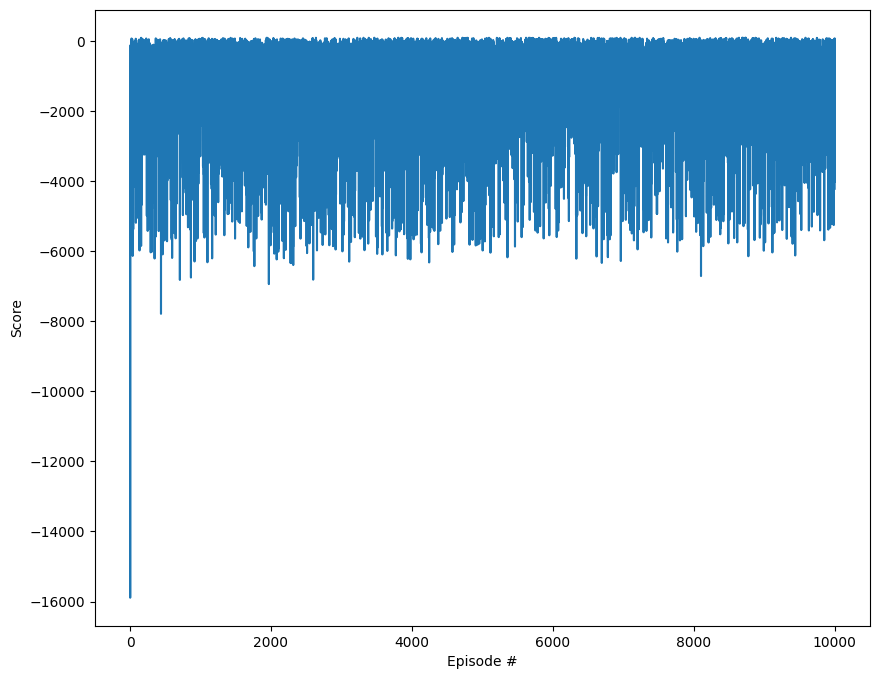

In [ ]:
# plot the scores
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
torch.save(actor_model.state_dict(), '/content/drive/My Drive/actor_model_weights.pth')
torch.save(critic_model.state_dict(), '/content/drive/My Drive/critic_model_weights.pth')

In [ ]:
from tqdm import tqdm

env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))
video_filename = '/content/vid.mp4'
max_steps = 100
# Evaluation
with imageio.get_writer(video_filename, fps=10) as video:
  obs = env.reset()[0]
  done = False
  for step in tqdm(range(max_steps)):
    action, _ = actor_model.act(obs)
    new_obs, reward, done, _, _ = env.step(action)
    video.append_data(env.render())
    obs = new_obs
    if done:
      print("done","reward=", total_reward,"num_of_steps=",step)
      break
embed_mp4(video_filename)

 10%|█         | 10/100 [00:00<00:02, 38.10it/s]

done reward= 0 num_of_steps= 10


In [ ]:
num_episodes = 100
steps_per_episode = []
rewards_per_episode = []
env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10(render_mode='rgb_array'))
max_steps = 100

# Run the episodes
for episode in range(num_episodes):
    obs = env.reset()[0]
    done = False
    total_reward = 0
    obs = obs.to(device)

    for step in range(max_steps):
        action, _ = actor_model.act(obs)
        new_obs, reward, done, _, _ = env.step(action)
        obs = new_obs
        total_reward += reward

        if done:
            steps_per_episode.append(step)
            rewards_per_episode.append(total_reward)
            break

# Calculate average number of steps
average_steps = np.mean(steps_per_episode)
print("Average number of steps:", average_steps)

# Calculate average reward
average_reward = np.mean(rewards_per_episode)
print("Average reward:", average_reward)
